In [60]:
import warnings
warnings.filterwarnings('ignore')

import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import xgboost as xgb
import missingno as msno

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
#from statsforecast.losses import smape
from pandas.plotting import scatter_matrix
from scipy.stats import skew ,boxcox
from sklearn.ensemble import GradientBoostingRegressor , RandomForestRegressor , AdaBoostClassifier ,RandomForestClassifier , GradientBoostingClassifier 
from sklearn.linear_model import  ElasticNet, Lasso, LinearRegression, Ridge , LassoCV , RidgeCV , ElasticNetCV 
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score , train_test_split , KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.preprocessing import MinMaxScaler ,RobustScaler

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

from scipy.special import inv_boxcox 
from scipy.stats import yeojohnson
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, PowerTransformer

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy.stats import boxcox, yeojohnson, skew

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler, PowerTransformer, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor , DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor,
    BaggingRegressor, VotingRegressor
)
from sklearn.neighbors import KNeighborsRegressor , KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor , XGBClassifier
from lightgbm import LGBMRegressor , LGBMClassifier
from catboost import CatBoostRegressor , CatBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score


sns.set()
%matplotlib inline

In [61]:
libraries = {
    "numpy": "np",
    "pandas": "pd",
    "scipy": "scipy",
    "statsmodels": "statsmodels",
    "matplotlib": "matplotlib",
    "seaborn": "sns",
    "plotly": "plotly",
    "scikit-learn": "sklearn",
    "xgboost": "xgboost",
    "catboost": "catboost",
    "lightgbm": "lightgbm"
}

# Dictionary to store library versions
library_versions = {}

# Check and print versions for each library
for lib in libraries.keys():
    try:
        # Special case for scikit-learn to debug the import explicitly
        if lib == "scikit-learn":
            import sklearn
            library_versions[lib] = sklearn.__version__
        else:
            module = __import__(lib)
            library_versions[lib] = module.__version__
    except ModuleNotFoundError:
        library_versions[lib] = "Not installed"
    except Exception as e:
        library_versions[lib] = f"Error: {str(e)}"

# Display results
for lib, version in library_versions.items():
    if version == "Not installed":
        print(f"{lib}: Not installed. Install using 'pip install {lib}'")
    else:
        print(f"{lib}: {version}")


numpy: 1.26.4
pandas: 2.2.2
scipy: 1.15.3
statsmodels: 0.14.2
matplotlib: 3.9.2
seaborn: 0.13.2
plotly: 5.24.1
scikit-learn: 1.5.1
xgboost: 3.0.0
catboost: 1.2.8
lightgbm: 4.6.0


In [62]:
life = pd.read_csv("Life Expectancy Data.csv")

In [63]:
#life["Status"].unique()
life["Status"].value_counts()

Status
Developing    2426
Developed      512
Name: count, dtype: int64

In [64]:
life.columns = [col.strip() for col in life.columns]
life.columns = life.columns.str.replace(" ", "_")
life.drop(columns=["Country", "Year"], inplace=True)
life.head()

Status  Life_expectancy  Adult_Mortality  infant_deaths  Alcohol  \
0  Developing             65.0            263.0             62     0.01   
1  Developing             59.9            271.0             64     0.01   
2  Developing             59.9            268.0             66     0.01   
3  Developing             59.5            272.0             69     0.01   
4  Developing             59.2            275.0             71     0.01   

   percentage_expenditure  Hepatitis_B  Measles   BMI  under-five_deaths  \
0               71.279624         65.0     1154  19.1                 83   
1               73.523582         62.0      492  18.6                 86   
2               73.219243         64.0      430  18.1                 89   
3               78.184215         67.0     2787  17.6                 93   
4                7.097109         68.0     3013  17.2                 97   

   Polio  Total_expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   
2   62.0               8.13        64.0       0.1  631.744976  31731688.0   
3   67.0               8.52        67.0       0.1  669.959000   3696958.0   
4   68.0               7.87        68.0       0.1   63.537231   2978599.0   

   thinness__1-19_years  thinness_5-9_years  Income_composition_of_resources  \
0                  17.2                17.3                            0.479   
1                  17.5                17.5                            0.476   
2                  17.7                17.7                            0.470   
3                  17.9                18.0                            0.463   
4                  18.2                18.2                            0.454   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5

In [65]:
target_col ="Life_expectancy"

In [66]:
display(life["Status"].value_counts())

Status
Developing    2426
Developed      512
Name: count, dtype: int64

In [67]:
life.dtypes

Status                              object
Life_expectancy                    float64
Adult_Mortality                    float64
infant_deaths                        int64
Alcohol                            float64
percentage_expenditure             float64
Hepatitis_B                        float64
Measles                              int64
BMI                                float64
under-five_deaths                    int64
Polio                              float64
Total_expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness__1-19_years               float64
thinness_5-9_years                 float64
Income_composition_of_resources    float64
Schooling                          float64
dtype: object

# Target Encoding

In [68]:
def target_encode(df, cat_column, target_column, smoothing=1.0):
    # Compute mean target per category
    means = df.groupby(cat_column)[target_column].mean()
    counts = df.groupby(cat_column)[target_column].count()
    global_mean = df[target_column].mean()
    
    # Apply smoothing
    smooth = (counts * means + smoothing * global_mean) / (counts + smoothing)
    
    # Map to the original column
    encoded_series = df[cat_column].map(smooth)
    
    return encoded_series, smooth

#medical['region_encoded'], region_encoding_map = target_encode(life, cat_column='region', target_column='charges')

# Label Encoding and OHE

In [69]:
unique_vals ={}
def auto_encode(df):
    df_encoded = df.copy()
    label_encoders = {}

    for col in df_encoded.columns:
        if df_encoded[col].dtype == 'object' or df_encoded[col].dtype.name == 'category':
            unique_vals = df_encoded[col].nunique()            
            # Binary categorical: Use Label Encoding
            if unique_vals == 2:
                print(col,": 2 catagories")
                le = LabelEncoder()
                df_encoded[col] = le.fit_transform(df_encoded[col])
                label_encoders[col] = le
            else:
                # Multi-class categorical: Use One-Hot Encoding
                print(col,": more than catagories")
                df_encoded = pd.get_dummies(df_encoded, columns=[col], prefix=col,drop_first=True)            

    return df_encoded

life = auto_encode(life)

Status : 2 catagories


In [70]:
life["Status"].unique()
life["Status"].value_counts()

Status
1    2426
0     512
Name: count, dtype: int64

In [71]:
life

Status  Life_expectancy  Adult_Mortality  infant_deaths  Alcohol  \
0          1             65.0            263.0             62     0.01   
1          1             59.9            271.0             64     0.01   
2          1             59.9            268.0             66     0.01   
3          1             59.5            272.0             69     0.01   
4          1             59.2            275.0             71     0.01   
...      ...              ...              ...            ...      ...   
2933       1             44.3            723.0             27     4.36   
2934       1             44.5            715.0             26     4.06   
2935       1             44.8             73.0             25     4.43   
2936       1             45.3            686.0             25     1.72   
2937       1             46.0            665.0             24     1.68   

      percentage_expenditure  Hepatitis_B  Measles   BMI  under-five_deaths  \
0                  71.279624         65.0     1154  19.1                 83   
1                  73.523582         62.0      492  18.6                 86   
2                  73.219243         64.0      430  18.1                 89   
3                  78.184215         67.0     2787  17.6                 93   
4                   7.097109         68.0     3013  17.2                 97   
...                      ...          ...      ...   ...                ...   
2933                0.000000         68.0       31  27.1                 42   
2934                0.000000          7.0      998  26.7                 41   
2935                0.000000         73.0      304  26.3                 40   
2936                0.000000         76.0      529  25.9                 39   
2937                0.000000         79.0     1483  25.5                 39   

      Polio  Total_expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0       6.0               8.16        65.0       0.1  584.259210  33736494.0   
1      58.0               8.18        62.0       0.1  612.696514    327582.0   
2      62.0               8.13        64.0       0.1  631.744976  31731688.0   
3      67.0               8.52        67.0       0.1  669.959000   3696958.0   
4      68.0               7.87        68.0       0.1   63.537231   2978599.0   
...     ...                ...         ...       ...         ...         ...   
2933   67.0               7.13        65.0      33.6  454.366654  12777511.0   
2934    7.0               6.52        68.0      36.7  453.351155  12633897.0   
2935   73.0               6.53        71.0      39.8   57.348340    125525.0   
2936   76.0               6.16        75.0      42.1  548.587312  12366165.0   
2937   78.0               7.10        78.0      43.5  547.358878  12222251.0   

      thinness__1-19_years  thinness_5-9_years  \
0                     17.2                17.3   
1                     17.5                17.5   
2                     17.7                17.7   
3                     17.9                18.0   
4                     18.2                18.2   
...                    ...                 ...   
2933                   9.4                 9.4   
2934                   9.8                 9.9   
2935                   1.2                 1.3   
2936                   1.6                 1.7   
2937                  11.0                11.2   

      Income_composition_of_resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937                            0.434        

# Replace TRUE FALSE to 1 and 0

In [72]:
def replace_true_false(df):
    #df_replaced = df.copy()
    for col in df.columns:
        if df[col].dtype == bool:
            df[col] = df[col].astype(int)        
        elif df[col].dtype == object:
            df[col] = df[col].astype(str).str.upper()
            df[col] = df[col].replace({'TRUE': 1, 'FALSE': 0})
    
    return df
life = replace_true_false(life)

In [73]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Status                           2938 non-null   int32  
 1   Life_expectancy                  2928 non-null   float64
 2   Adult_Mortality                  2928 non-null   float64
 3   infant_deaths                    2938 non-null   int64  
 4   Alcohol                          2744 non-null   float64
 5   percentage_expenditure           2938 non-null   float64
 6   Hepatitis_B                      2385 non-null   float64
 7   Measles                          2938 non-null   int64  
 8   BMI                              2904 non-null   float64
 9   under-five_deaths                2938 non-null   int64  
 10  Polio                            2919 non-null   float64
 11  Total_expenditure                2712 non-null   float64
 12  Diphtheria          

# NAN Check

In [74]:
life["Status"].unique()
life["Status"].value_counts()

Status
1    2426
0     512
Name: count, dtype: int64

In [75]:
life.dtypes

Status                               int32
Life_expectancy                    float64
Adult_Mortality                    float64
infant_deaths                        int64
Alcohol                            float64
percentage_expenditure             float64
Hepatitis_B                        float64
Measles                              int64
BMI                                float64
under-five_deaths                    int64
Polio                              float64
Total_expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness__1-19_years               float64
thinness_5-9_years                 float64
Income_composition_of_resources    float64
Schooling                          float64
dtype: object

In [76]:
for col in life.columns:
    print(col,"contains:", np.isnan(life[col]).any())

Status contains: False
Life_expectancy contains: True
Adult_Mortality contains: True
infant_deaths contains: False
Alcohol contains: True
percentage_expenditure contains: False
Hepatitis_B contains: True
Measles contains: False
BMI contains: True
under-five_deaths contains: False
Polio contains: True
Total_expenditure contains: True
Diphtheria contains: True
HIV/AIDS contains: False
GDP contains: True
Population contains: True
thinness__1-19_years contains: True
thinness_5-9_years contains: True
Income_composition_of_resources contains: True
Schooling contains: True


In [77]:
life.isnull().sum()

Status                               0
Life_expectancy                     10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            194
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
under-five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness__1-19_years                34
thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

# Missing values

In [78]:
def missing_percentage(life):
    missing = life.isnull().sum()
    total = life.shape[0]
    percent_missing = (missing / total) * 100
    result = pd.DataFrame({
        'Missing Values': missing,
        'Percent Missing': percent_missing.round(2),
        "data_types" : life.dtypes.astype(str)
    })
    return result[result['Missing Values'] > 0].sort_values(by='Percent Missing', ascending=False)

missing_report = missing_percentage(life)
missing_report

Missing Values  Percent Missing data_types
Population                                  652            22.19    float64
Hepatitis_B                                 553            18.82    float64
GDP                                         448            15.25    float64
Total_expenditure                           226             7.69    float64
Alcohol                                     194             6.60    float64
Income_composition_of_resources             167             5.68    float64
Schooling                                   163             5.55    float64
BMI                                          34             1.16    float64
thinness__1-19_years                         34             1.16    float64
thinness_5-9_years                           34             1.16    float64
Polio                                        19             0.65    float64
Diphtheria                                   19             0.65    float64
Life_expectancy                              10             0.34    float64
Adult_Mortality                              10             0.34    float64

# Replacing Missing Values

##### **Summary Decision Matrix**
##### **Missing %	Type of Data	Best Strategy**
###### **< 5%	Any	Drop rows / Mean / Median**
###### **5%–15%	Numeric	Mean / Median / KNN**
###### **15%–30%	Numeric/Cat	KNN / Interpolation / Flags**
###### **> 40%	Any	Drop column / Model-based / Flag**
###### **Time Series	Numeric	Forward fill / Interpolation**
###### **Skewed	Numeric	Median / Model-based**
###### **Categorical	Categorical	Mode / One-hot + Indicator**

In [79]:
def impute_missing_values(df):
    df_imputed = df.copy()

    for col in df.columns:
        if df[col].isnull().sum() > 0:
            if df[col].dtype == 'object' or df[col].dtype.name == 'category':
                # Categorical: use mode
                mode_val = df[col].mode()[0]
                df_imputed[col].fillna(mode_val, inplace=True)
                print(f"Imputed '{col}' with MODE: {mode_val}")
            else:
                # Numeric column
                skew_val = df[col].skew()
                if abs(skew_val) < 0.5:
                    mean_val = df[col].mean()
                    df_imputed[col].fillna(mean_val, inplace=True)
                    print(f"Imputed '{col}' with MEAN: {round(mean_val, 2)} (Skew: {round(skew_val, 2)})")
                else:
                    median_val = df[col].median()
                    df_imputed[col].fillna(median_val, inplace=True)
                    print(f"Imputed '{col}' with MEDIAN: {round(median_val, 2)} (Skew: {round(skew_val, 2)})")
    
    return df_imputed

In [80]:
life = impute_missing_values(life)

Imputed 'Life_expectancy' with MEDIAN: 72.1 (Skew: -0.64)
Imputed 'Adult_Mortality' with MEDIAN: 144.0 (Skew: 1.17)
Imputed 'Alcohol' with MEDIAN: 3.75 (Skew: 0.59)
Imputed 'Hepatitis_B' with MEDIAN: 92.0 (Skew: -1.93)
Imputed 'BMI' with MEAN: 38.32 (Skew: -0.22)
Imputed 'Polio' with MEDIAN: 93.0 (Skew: -2.1)
Imputed 'Total_expenditure' with MEDIAN: 5.75 (Skew: 0.62)
Imputed 'Diphtheria' with MEDIAN: 93.0 (Skew: -2.07)
Imputed 'GDP' with MEDIAN: 1766.95 (Skew: 3.21)
Imputed 'Population' with MEDIAN: 1386542.0 (Skew: 15.92)
Imputed 'thinness__1-19_years' with MEDIAN: 3.3 (Skew: 1.71)
Imputed 'thinness_5-9_years' with MEDIAN: 3.3 (Skew: 1.78)
Imputed 'Income_composition_of_resources' with MEDIAN: 0.68 (Skew: -1.14)
Imputed 'Schooling' with MEDIAN: 12.3 (Skew: -0.6)


In [81]:
missing_report = missing_percentage(life)
missing_report

Empty DataFrame
Columns: [Missing Values, Percent Missing, data_types]
Index: []

In [82]:
life["Status"].unique()
life["Status"].value_counts()

Status
1    2426
0     512
Name: count, dtype: int64

In [83]:
life.skew()

Status                             -1.718238
Life_expectancy                    -0.642391
Adult_Mortality                     1.177899
infant_deaths                       9.786963
Alcohol                             0.649578
percentage_expenditure              4.652051
Hepatitis_B                        -2.281697
Measles                             9.441332
BMI                                -0.220590
under-five_deaths                   9.495065
Polio                              -2.108909
Total_expenditure                   0.661108
Diphtheria                         -2.083566
HIV/AIDS                            5.396112
GDP                                 3.543756
Population                         17.972837
thinness__1-19_years                1.729496
thinness_5-9_years                  1.795694
Income_composition_of_resources    -1.212526
Schooling                          -0.635052
dtype: float64

# Co-relation of Indepepdent values with target

In [84]:
def correlation_with_target(df, target_col, method='spearman'):
    if df is None or not isinstance(df, pd.DataFrame):
        raise TypeError("Parameter 'df' must be a pandas DataFrame.")
    
    if not target_col or target_col not in df.columns:
        raise ValueError(f"Target column '{target_col}' must be specified and exist in the DataFrame.")

    if method not in ['pearson', 'spearman', 'kendall']:
        raise ValueError("Method must be one of: 'pearson', 'spearman', 'kendall'.")
    
    numeric_df = df.select_dtypes(include='number')
    if target_col not in numeric_df.columns:
        raise ValueError(f"Target column '{target_col}' must be numeric.")
    corr_series = numeric_df.corr(method=method)[target_col].drop(target_col)
    correlation_df = corr_series.to_frame(name='Correlation with Target')
    correlation_df['Correlation Level'] = correlation_df['Correlation with Target'].apply(
        lambda x: 'Highly Correlated' if abs(x) >= 0.7
        else 'Moderately Correlated' if abs(x) >= 0.3
        else 'Low Correlation'
    )
    correlation_df['Correlation Direction'] = correlation_df['Correlation with Target'].apply(
        lambda x: 'Positive Correlation' if x >= 0 else 'Negative Correlation'
    )
    correlation_df = correlation_df.reindex(
        correlation_df['Correlation with Target'].abs().sort_values(ascending=False).index
    )
    return correlation_df

correlation_with_target(life, target_col='Life_expectancy')

Correlation with Target  \
Income_composition_of_resources                 0.829403   
Schooling                                       0.777799   
HIV/AIDS                                       -0.752682   
Adult_Mortality                                -0.650416   
under-five_deaths                              -0.616585   
thinness_5-9_years                             -0.613080   
thinness__1-19_years                           -0.603003   
infant_deaths                                  -0.598884   
GDP                                             0.597506   
BMI                                             0.581798   
Status                                         -0.545256   
Diphtheria                                      0.540717   
Polio                                           0.531353   
percentage_expenditure                          0.427352   
Alcohol                                         0.424328   
Hepatitis_B                                     0.297787   
Total_expenditure                               0.283301   
Measles                                        -0.280493   
Population                                     -0.071837   

                                     Correlation Level Correlation Direction  
Income_composition_of_resources      Highly Correlated  Positive Correlation  
Schooling                            Highly Correlated  Positive Correlation  
HIV/AIDS                             Highly Correlated  Negative Correlation  
Adult_Mortality                  Moderately Correlated  Negative Correlation  
under-five_deaths                Moderately Correlated  Negative Correlation  
thinness_5-9_years               Moderately Correlated  Negative Correlation  
thinness__1-19_years             Moderately Correlated  Negative Correlation  
infant_deaths                    Moderately Correlated  Negative Correlation  
GDP                              Moderately Correlated  Positive Correlation  
BMI                              Moderately Correlated  Positive Correlation  
Status                           Moderately Correlated  Negative Correlation  
Diphtheria                       Moderately Correlated  Positive Correlation  
Polio                            Moderately Correlated  Positive Correlation  
percentage_expenditure           Moderately Correlated  Positive Correlation  
Alcohol                          Moderately Correlated  Positive Correlation  
Hepatitis_B                            Low Correlation  Positive Correlation  
Total_expenditure                      Low Correlation  Positive Correlation  
Measles                                Low Correlation  Negative Correlation  
Population                             Low Correlation  Negative Correlation

In [85]:
life

Status  Life_expectancy  Adult_Mortality  infant_deaths  Alcohol  \
0          1             65.0            263.0             62     0.01   
1          1             59.9            271.0             64     0.01   
2          1             59.9            268.0             66     0.01   
3          1             59.5            272.0             69     0.01   
4          1             59.2            275.0             71     0.01   
...      ...              ...              ...            ...      ...   
2933       1             44.3            723.0             27     4.36   
2934       1             44.5            715.0             26     4.06   
2935       1             44.8             73.0             25     4.43   
2936       1             45.3            686.0             25     1.72   
2937       1             46.0            665.0             24     1.68   

      percentage_expenditure  Hepatitis_B  Measles   BMI  under-five_deaths  \
0                  71.279624         65.0     1154  19.1                 83   
1                  73.523582         62.0      492  18.6                 86   
2                  73.219243         64.0      430  18.1                 89   
3                  78.184215         67.0     2787  17.6                 93   
4                   7.097109         68.0     3013  17.2                 97   
...                      ...          ...      ...   ...                ...   
2933                0.000000         68.0       31  27.1                 42   
2934                0.000000          7.0      998  26.7                 41   
2935                0.000000         73.0      304  26.3                 40   
2936                0.000000         76.0      529  25.9                 39   
2937                0.000000         79.0     1483  25.5                 39   

      Polio  Total_expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0       6.0               8.16        65.0       0.1  584.259210  33736494.0   
1      58.0               8.18        62.0       0.1  612.696514    327582.0   
2      62.0               8.13        64.0       0.1  631.744976  31731688.0   
3      67.0               8.52        67.0       0.1  669.959000   3696958.0   
4      68.0               7.87        68.0       0.1   63.537231   2978599.0   
...     ...                ...         ...       ...         ...         ...   
2933   67.0               7.13        65.0      33.6  454.366654  12777511.0   
2934    7.0               6.52        68.0      36.7  453.351155  12633897.0   
2935   73.0               6.53        71.0      39.8   57.348340    125525.0   
2936   76.0               6.16        75.0      42.1  548.587312  12366165.0   
2937   78.0               7.10        78.0      43.5  547.358878  12222251.0   

      thinness__1-19_years  thinness_5-9_years  \
0                     17.2                17.3   
1                     17.5                17.5   
2                     17.7                17.7   
3                     17.9                18.0   
4                     18.2                18.2   
...                    ...                 ...   
2933                   9.4                 9.4   
2934                   9.8                 9.9   
2935                   1.2                 1.3   
2936                   1.6                 1.7   
2937                  11.0                11.2   

      Income_composition_of_resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937                            0.434        

In [86]:
def multicolinearity(life):
    X = add_constant(life)    #This is done because many statistical models require an intercept term.
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    # Drop  column it’s not an actual feature — it's just there for model fitting.
    vif_data = vif_data[vif_data["Feature"] != "const"]
    
    # Add interpretation column
    def interpret_vif(vif):
        if vif < 1.5:
            return "Low"
        elif vif < 5:
            return "Moderate"
        else:
            return "High"
    
    vif_data["Multicollinearity Level"] = vif_data["VIF"].apply(interpret_vif)
    return vif_data

print("Data:",multicolinearity(life))

Data:                             Feature         VIF Multicollinearity Level
1                            Status    1.901502                Moderate
2                   Life_expectancy    5.549895                    High
3                   Adult_Mortality    2.109420                Moderate
4                     infant_deaths  185.673342                    High
5                           Alcohol    1.848559                Moderate
6            percentage_expenditure    5.770609                    High
7                       Hepatitis_B    1.320683                     Low
8                           Measles    1.381594                     Low
9                               BMI    1.781310                Moderate
10                under-five_deaths  184.941303                    High
11                            Polio    1.965335                Moderate
12                Total_expenditure    1.206663                     Low
13                       Diphtheria    2.214769           

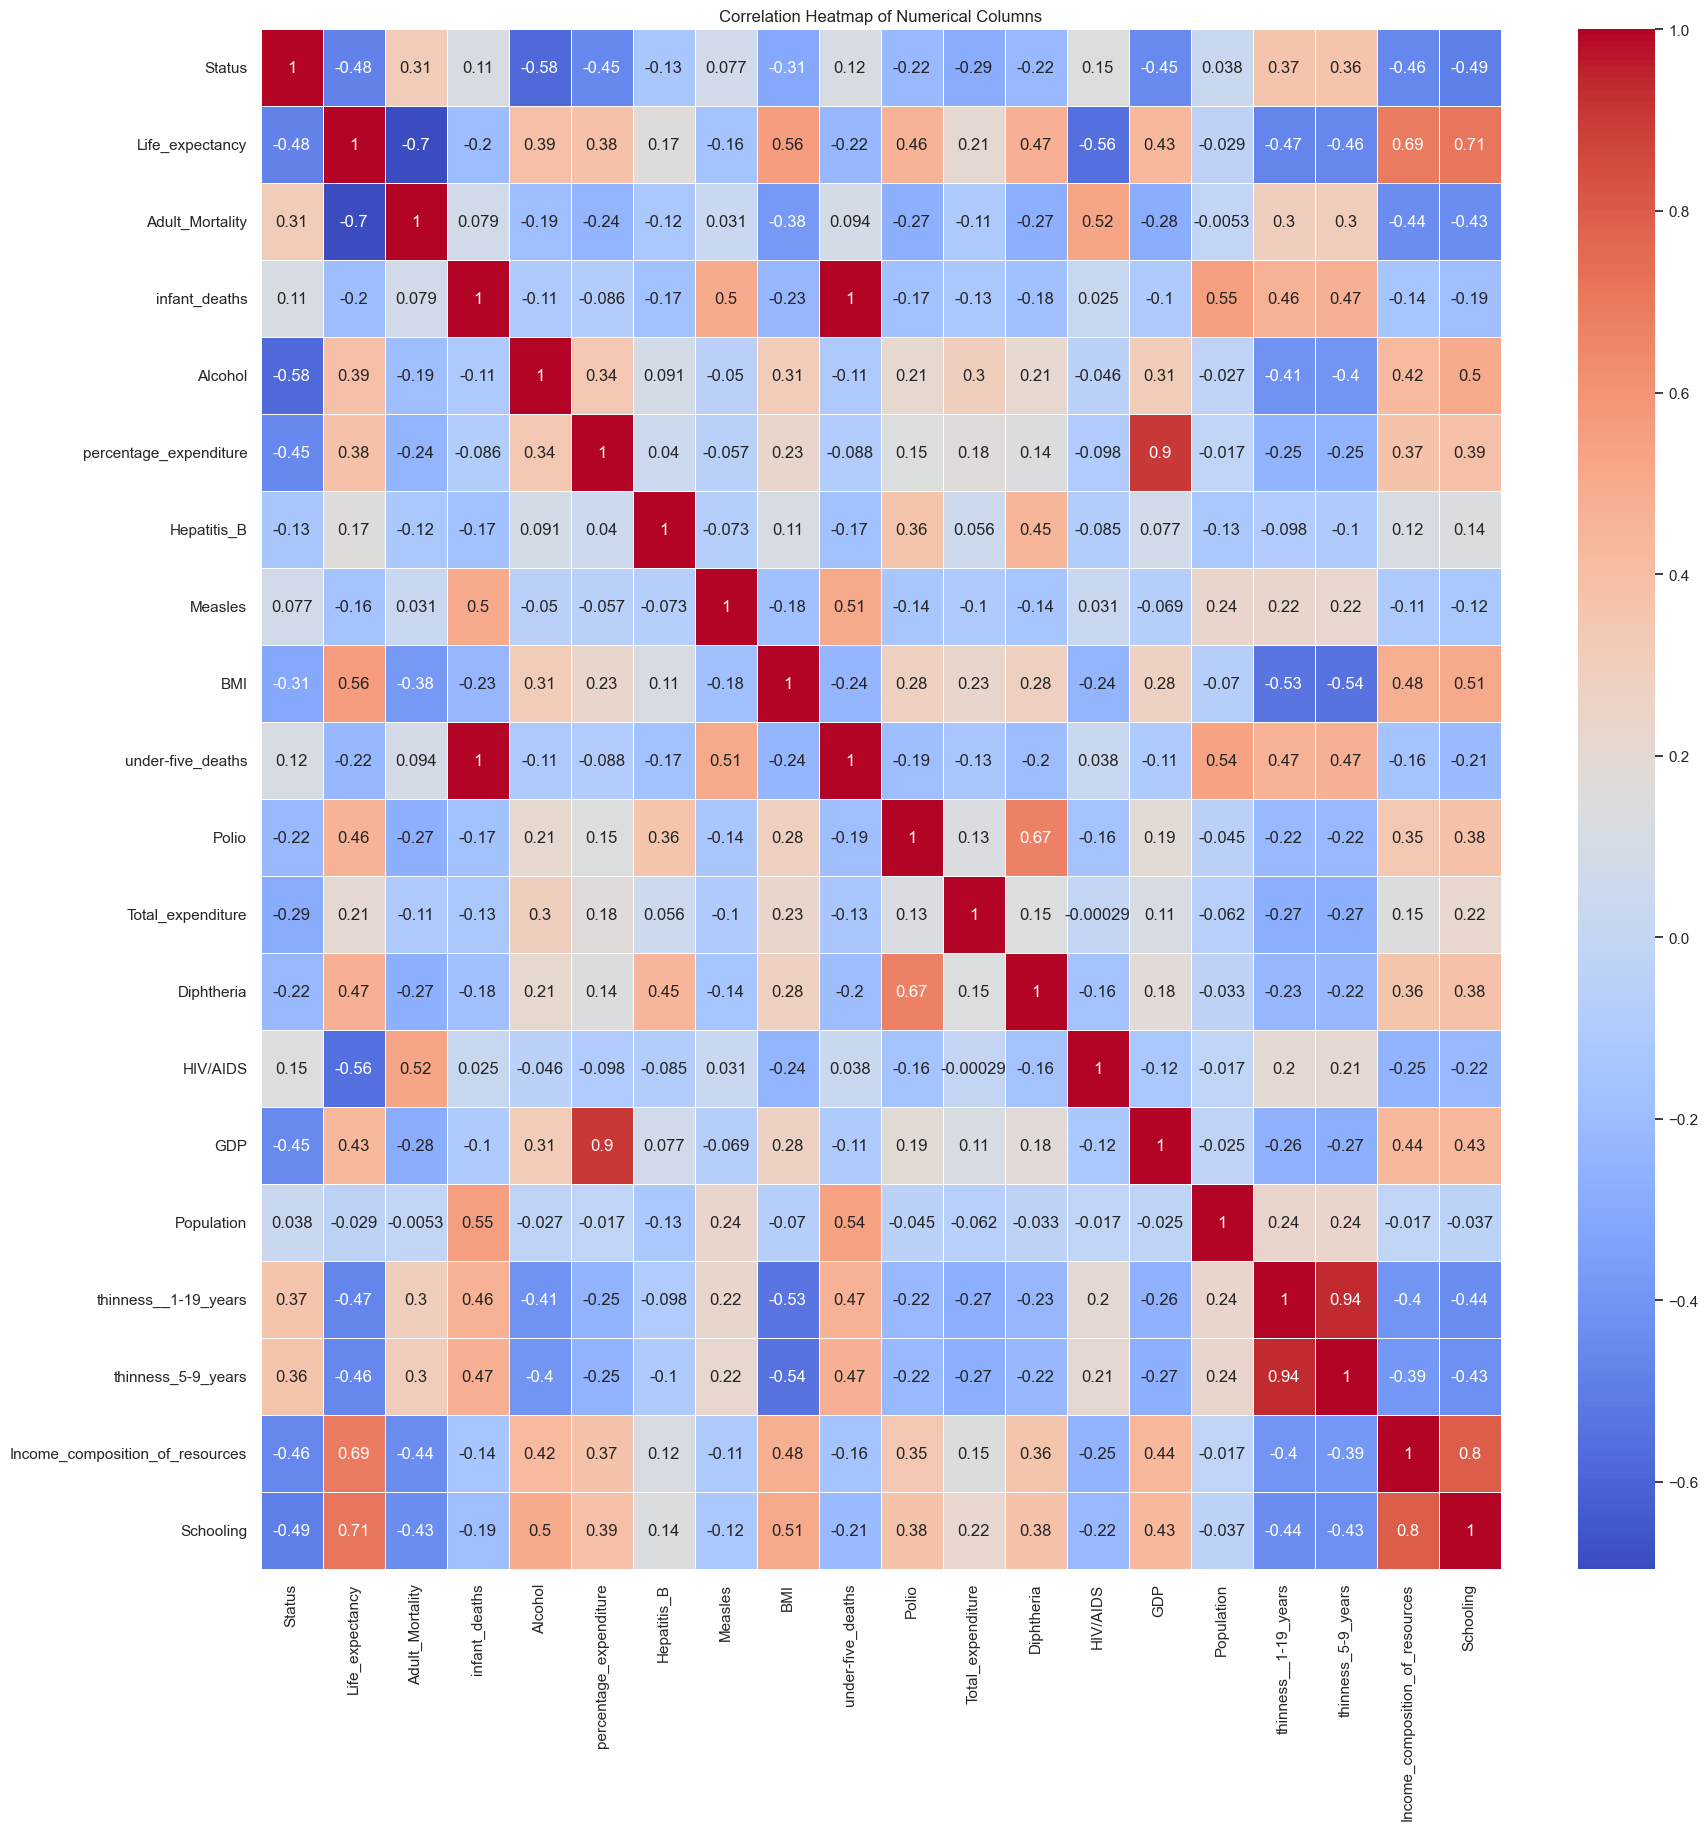

In [87]:
# Create the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(life.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

In [88]:
missing_percentage = round(life.isna().mean() * 100, 2)
data_types = life.dtypes.astype(str)
summary = pd.DataFrame({'Missing_Percentage': missing_percentage,'Data_Type': data_types})
summary

Missing_Percentage Data_Type
Status                                          0.0     int32
Life_expectancy                                 0.0   float64
Adult_Mortality                                 0.0   float64
infant_deaths                                   0.0     int64
Alcohol                                         0.0   float64
percentage_expenditure                          0.0   float64
Hepatitis_B                                     0.0   float64
Measles                                         0.0     int64
BMI                                             0.0   float64
under-five_deaths                               0.0     int64
Polio                                           0.0   float64
Total_expenditure                               0.0   float64
Diphtheria                                      0.0   float64
HIV/AIDS                                        0.0   float64
GDP                                             0.0   float64
Population                                      0.0   float64
thinness__1-19_years                            0.0   float64
thinness_5-9_years                              0.0   float64
Income_composition_of_resources                 0.0   float64
Schooling                                       0.0   float64

## Replace missing Values with mean

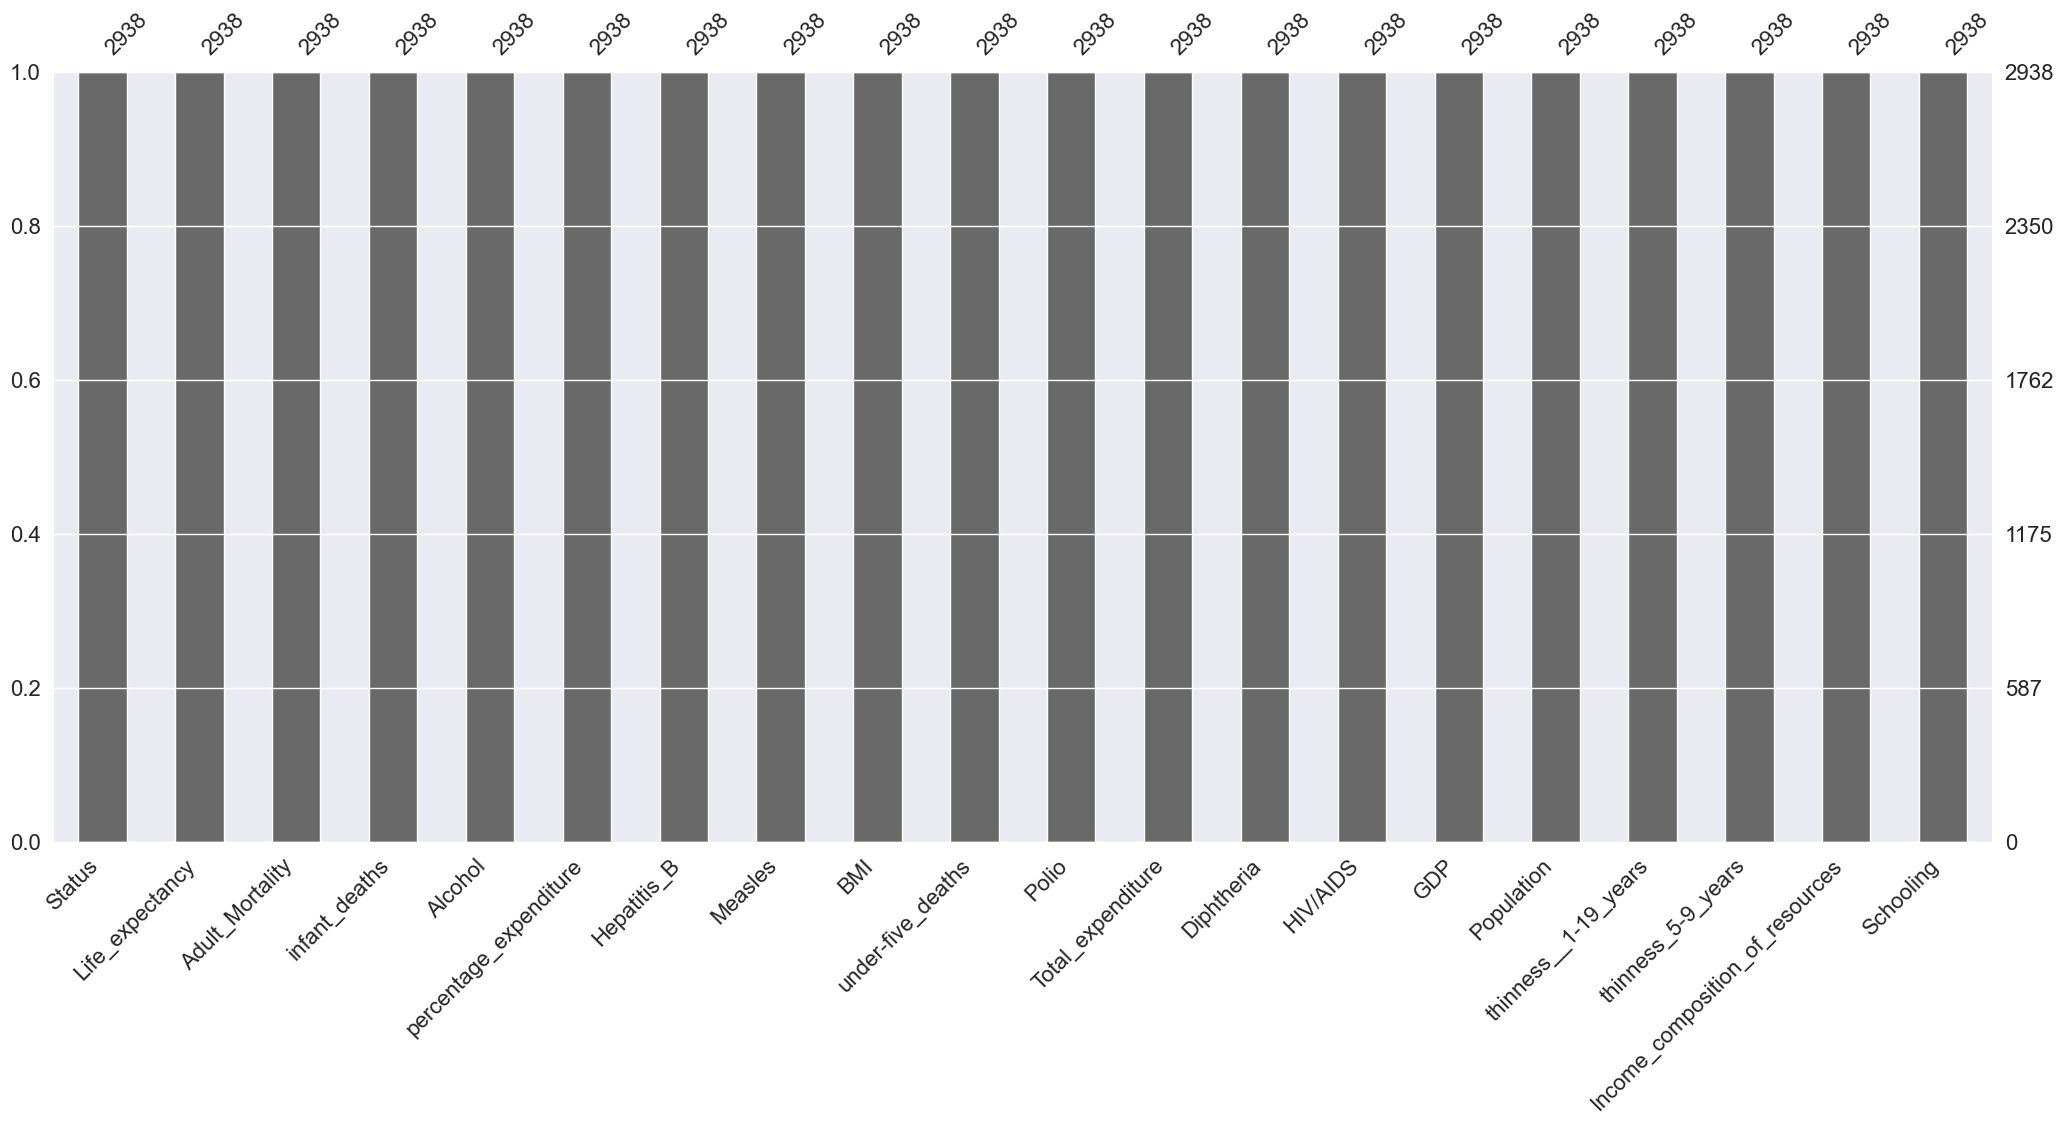

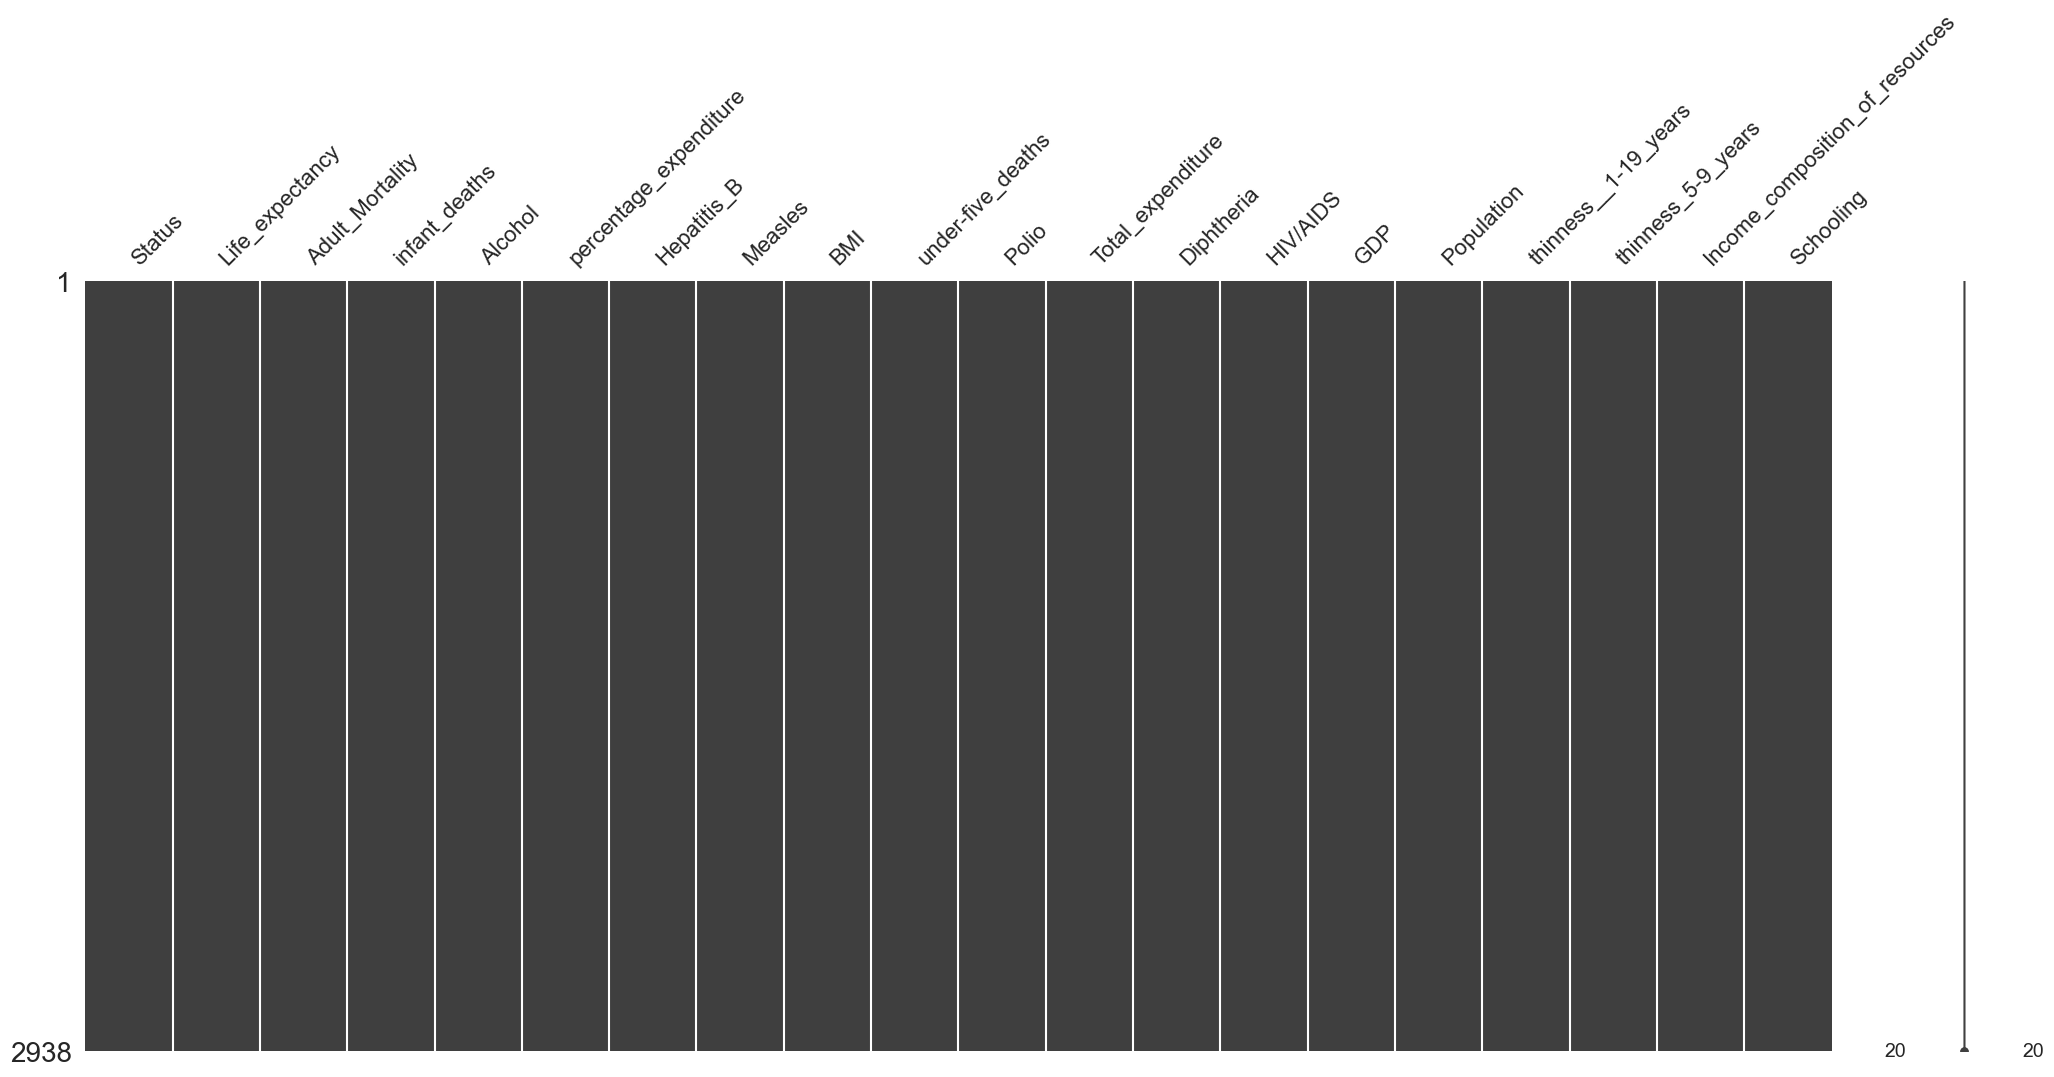

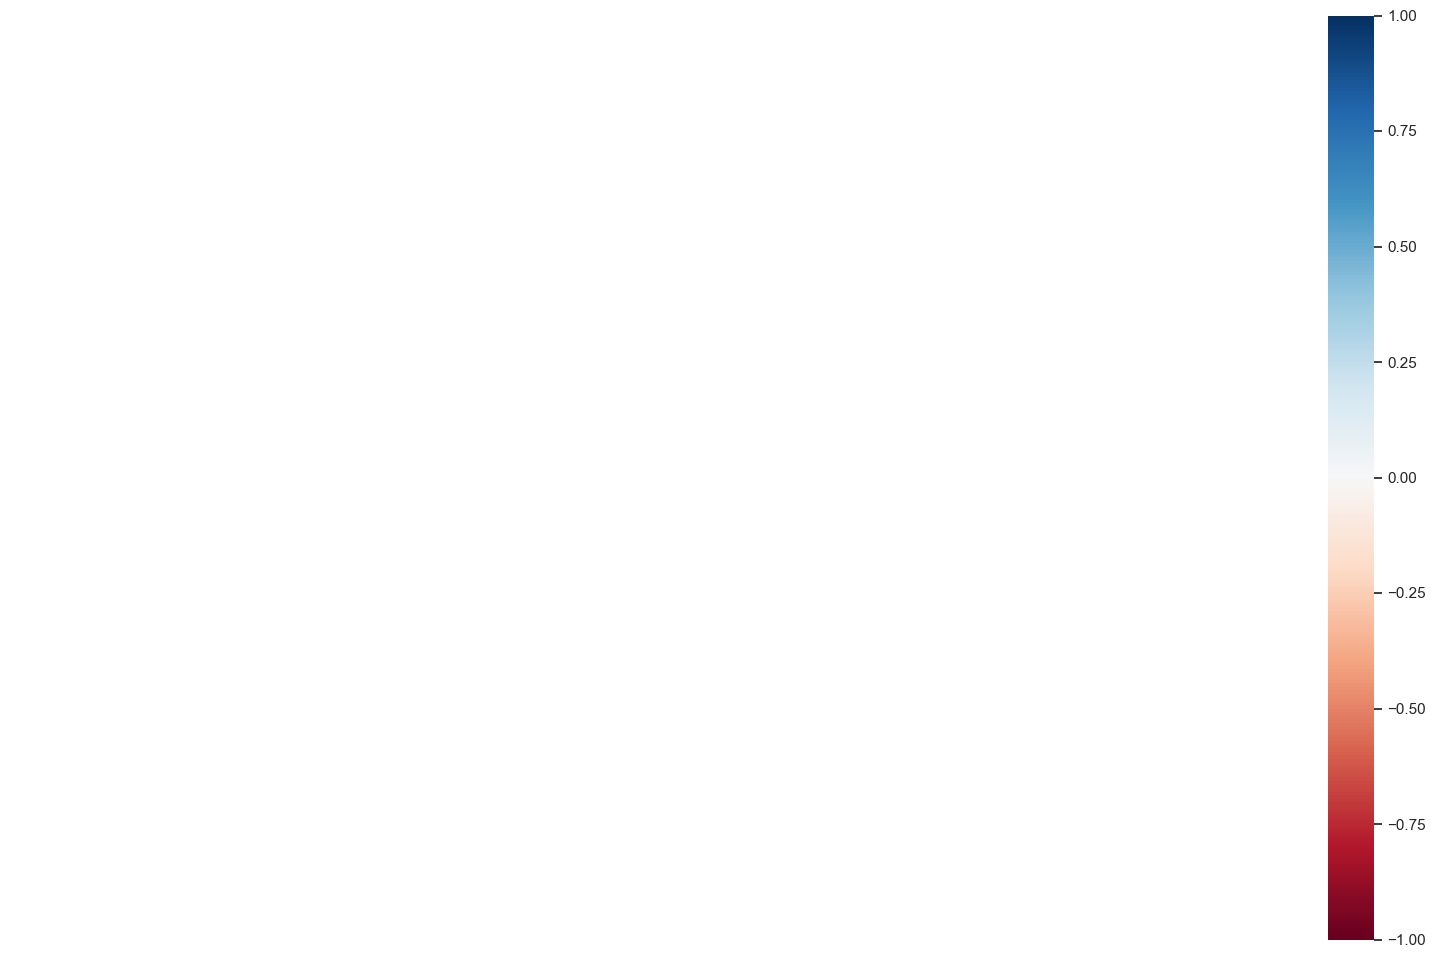

In [89]:
msno.bar(life)
msno.matrix(life)
msno.heatmap(life)
plt.show()

In [90]:
for col in life.columns:
    if life[col].isnull().sum() > 0:
        life[col] = life[col].fillna(life[col].mean())
missing_percentage = round(life.isnull().mean() * 100,2)
missing_percentage

Status                             0.0
Life_expectancy                    0.0
Adult_Mortality                    0.0
infant_deaths                      0.0
Alcohol                            0.0
percentage_expenditure             0.0
Hepatitis_B                        0.0
Measles                            0.0
BMI                                0.0
under-five_deaths                  0.0
Polio                              0.0
Total_expenditure                  0.0
Diphtheria                         0.0
HIV/AIDS                           0.0
GDP                                0.0
Population                         0.0
thinness__1-19_years               0.0
thinness_5-9_years                 0.0
Income_composition_of_resources    0.0
Schooling                          0.0
dtype: float64

# Visualization

In [91]:
life

Status  Life_expectancy  Adult_Mortality  infant_deaths  Alcohol  \
0          1             65.0            263.0             62     0.01   
1          1             59.9            271.0             64     0.01   
2          1             59.9            268.0             66     0.01   
3          1             59.5            272.0             69     0.01   
4          1             59.2            275.0             71     0.01   
...      ...              ...              ...            ...      ...   
2933       1             44.3            723.0             27     4.36   
2934       1             44.5            715.0             26     4.06   
2935       1             44.8             73.0             25     4.43   
2936       1             45.3            686.0             25     1.72   
2937       1             46.0            665.0             24     1.68   

      percentage_expenditure  Hepatitis_B  Measles   BMI  under-five_deaths  \
0                  71.279624         65.0     1154  19.1                 83   
1                  73.523582         62.0      492  18.6                 86   
2                  73.219243         64.0      430  18.1                 89   
3                  78.184215         67.0     2787  17.6                 93   
4                   7.097109         68.0     3013  17.2                 97   
...                      ...          ...      ...   ...                ...   
2933                0.000000         68.0       31  27.1                 42   
2934                0.000000          7.0      998  26.7                 41   
2935                0.000000         73.0      304  26.3                 40   
2936                0.000000         76.0      529  25.9                 39   
2937                0.000000         79.0     1483  25.5                 39   

      Polio  Total_expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0       6.0               8.16        65.0       0.1  584.259210  33736494.0   
1      58.0               8.18        62.0       0.1  612.696514    327582.0   
2      62.0               8.13        64.0       0.1  631.744976  31731688.0   
3      67.0               8.52        67.0       0.1  669.959000   3696958.0   
4      68.0               7.87        68.0       0.1   63.537231   2978599.0   
...     ...                ...         ...       ...         ...         ...   
2933   67.0               7.13        65.0      33.6  454.366654  12777511.0   
2934    7.0               6.52        68.0      36.7  453.351155  12633897.0   
2935   73.0               6.53        71.0      39.8   57.348340    125525.0   
2936   76.0               6.16        75.0      42.1  548.587312  12366165.0   
2937   78.0               7.10        78.0      43.5  547.358878  12222251.0   

      thinness__1-19_years  thinness_5-9_years  \
0                     17.2                17.3   
1                     17.5                17.5   
2                     17.7                17.7   
3                     17.9                18.0   
4                     18.2                18.2   
...                    ...                 ...   
2933                   9.4                 9.4   
2934                   9.8                 9.9   
2935                   1.2                 1.3   
2936                   1.6                 1.7   
2937                  11.0                11.2   

      Income_composition_of_resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937                            0.434        

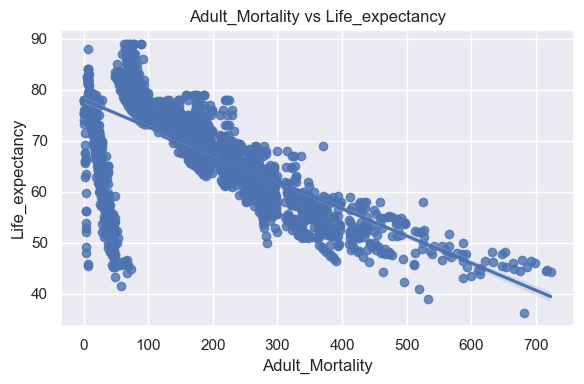

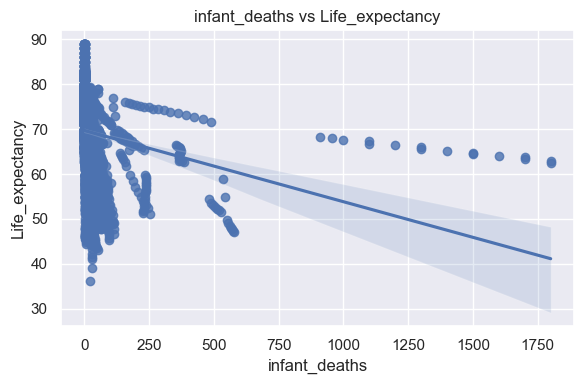

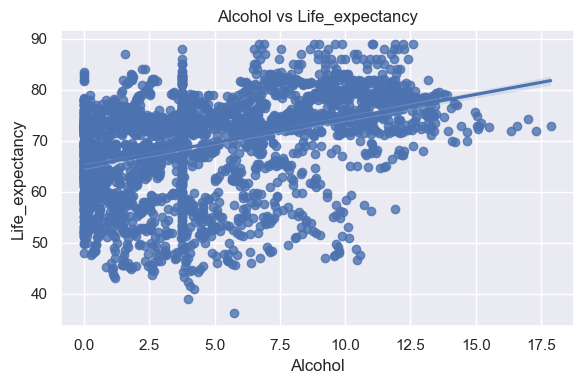

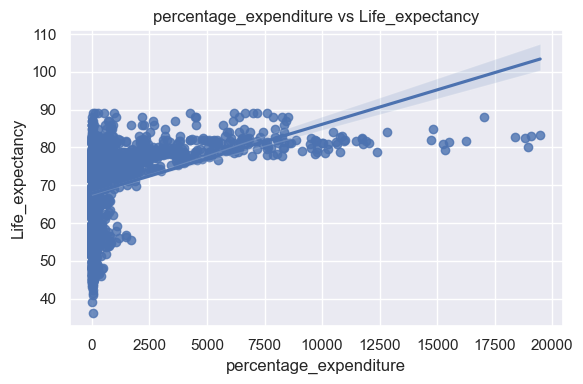

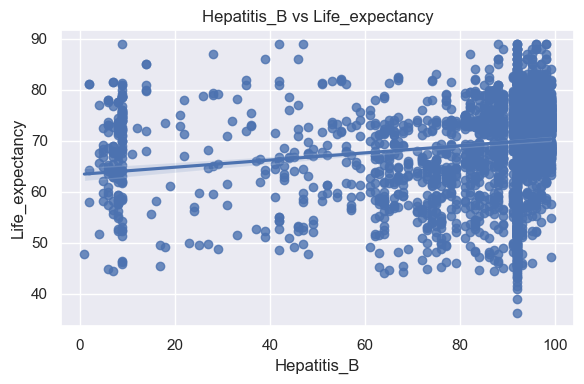

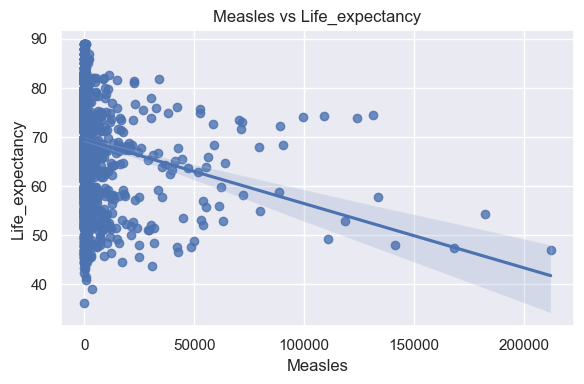

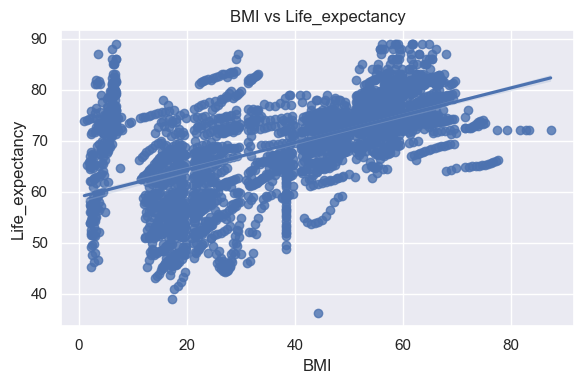

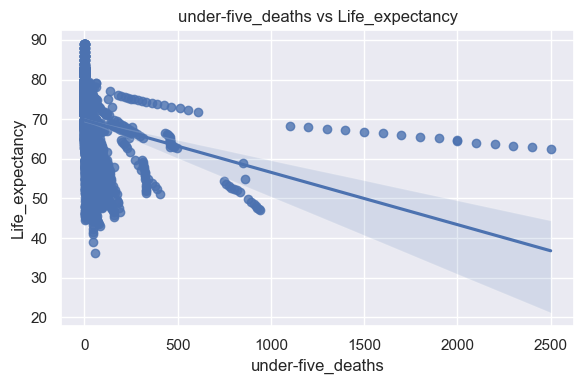

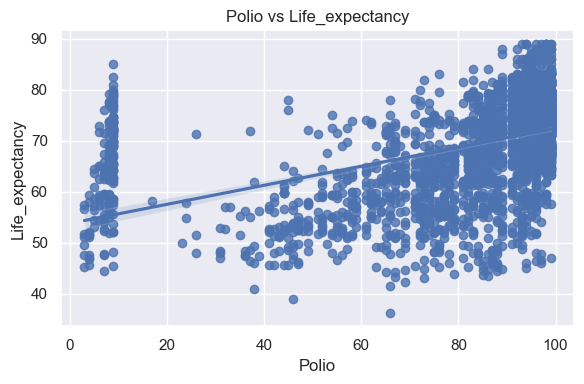

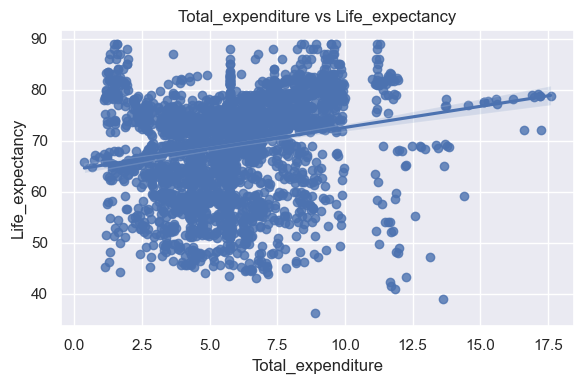

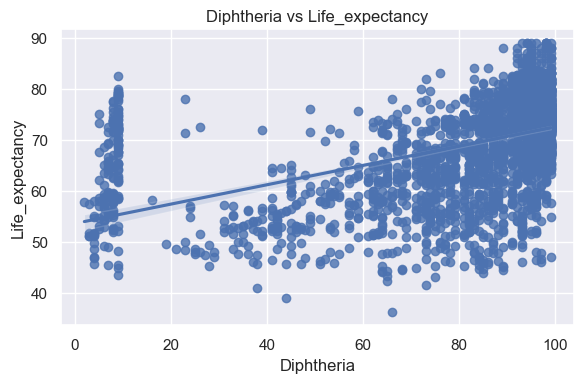

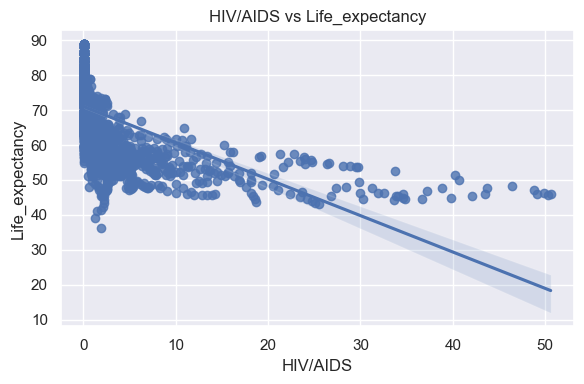

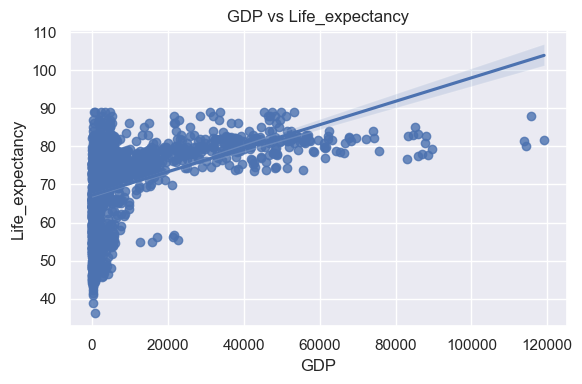

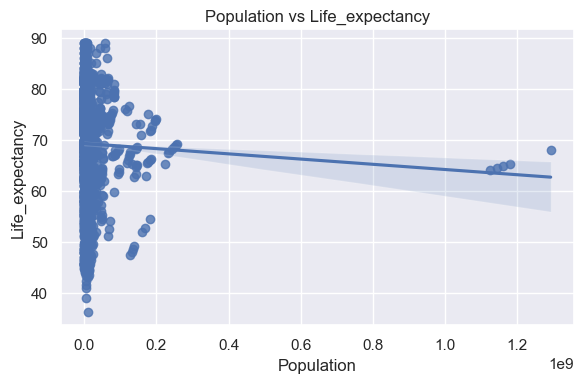

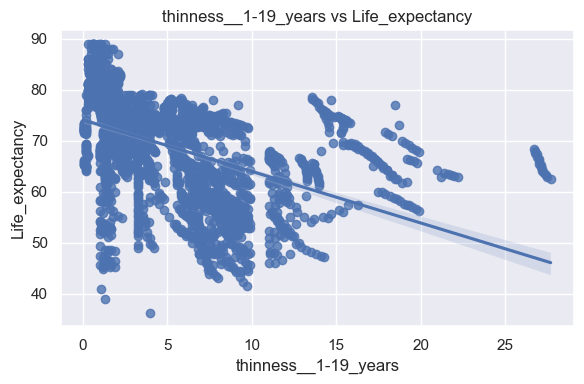

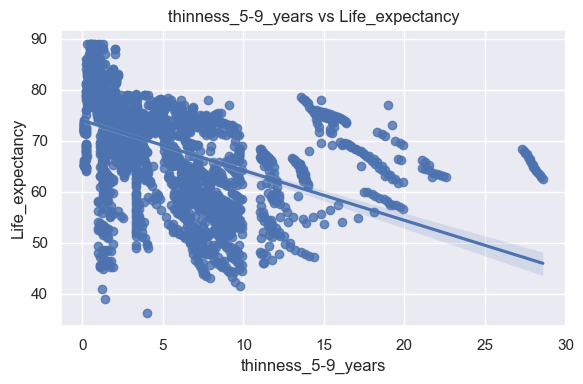

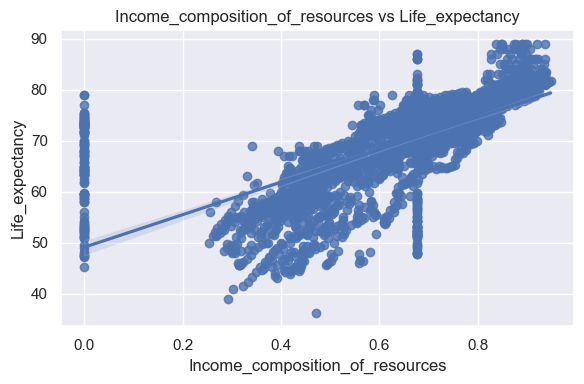

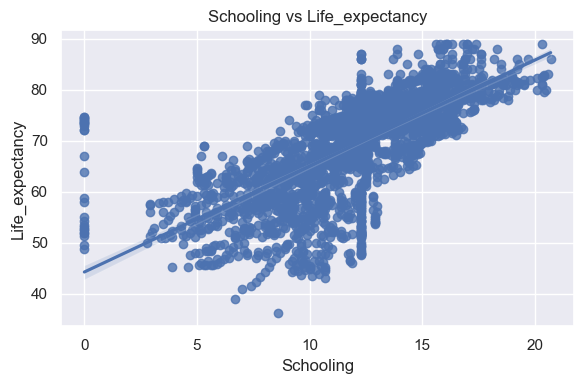

In [92]:
cols = life.columns.drop("Life_expectancy")
for col in cols:
    if life[col].dtype in ['float64', 'int64']:  # Only plot numerical features
        plt.figure(figsize=(6, 4))
        sns.regplot(x=col, y='Life_expectancy', data=life)
        plt.title(f'{col} vs Life_expectancy')
        plt.tight_layout()
        plt.show()


In [93]:
life.corr().T

Status  Life_expectancy  Adult_Mortality  \
Status                           1.000000        -0.481415         0.314894   
Life_expectancy                 -0.481415         1.000000        -0.696390   
Adult_Mortality                  0.314894        -0.696390         1.000000   
infant_deaths                    0.112252        -0.196769         0.078890   
Alcohol                         -0.579662         0.388918        -0.190191   
percentage_expenditure          -0.454261         0.381418        -0.242628   
Hepatitis_B                     -0.127008         0.170219        -0.123287   
Measles                          0.076955        -0.157767         0.031293   
BMI                             -0.310873         0.560453        -0.382143   
under-five_deaths                0.115195        -0.222738         0.094280   
Polio                           -0.218628         0.458399        -0.270002   
Total_expenditure               -0.290431         0.208844        -0.111796   
Diphtheria                      -0.215281         0.472211        -0.270301   
HIV/AIDS                         0.148590        -0.556703         0.523886   
GDP                             -0.445981         0.430461        -0.281434   
Population                       0.037606        -0.029014        -0.005292   
thinness__1-19_years             0.365814        -0.468002         0.296135   
thinness_5-9_years               0.364179        -0.462473         0.301634   
Income_composition_of_resources -0.460677         0.688662        -0.436332   
Schooling                       -0.492984         0.713054        -0.433415   

                                 infant_deaths   Alcohol  \
Status                                0.112252 -0.579662   
Life_expectancy                      -0.196769  0.388918   
Adult_Mortality                       0.078890 -0.190191   
infant_deaths                         1.000000 -0.112918   
Alcohol                              -0.112918  1.000000   
percentage_expenditure               -0.085612  0.344410   
Hepatitis_B                          -0.167421  0.090850   
Measles                               0.501128 -0.049752   
BMI                                  -0.227220  0.314697   
under-five_deaths                     0.996629 -0.109790   
Polio                                -0.170896  0.211744   
Total_expenditure                    -0.126268  0.296153   
Diphtheria                           -0.175376  0.212388   
HIV/AIDS                              0.025231 -0.046235   
GDP                                  -0.102829  0.313060   
Population                            0.551667 -0.026836   
thinness__1-19_years                  0.464811 -0.413021   
thinness_5-9_years                    0.470445 -0.402034   
Income_composition_of_resources      -0.141571  0.418372   
Schooling                            -0.190951  0.498899   

                                 percentage_expenditure  Hepatitis_B  \
Status                                        -0.454261    -0.127008   
Life_expectancy                                0.381418     0.170219   
Adult_Mortality                               -0.242628    -0.123287   
infant_deaths                                 -0.085612    -0.167421   
Alcohol                                        0.344410     0.090850   
percentage_expenditure                         1.000000     0.039528   
Hepatitis_B                                    0.039528     1.000000   
Measles                                       -0.056596    -0.073021   
BMI                                            0.228537     0.112438   
under-five_deaths                             -0.087852    -0.170549   
Polio                                          0.146148     0.364890   
Total_expenditure                              0.175559     0.055988   
Diphtheria                                     0.142506     0.449151   
HIV/AIDS                                      -0.097857    -0.085497   
GDP                               

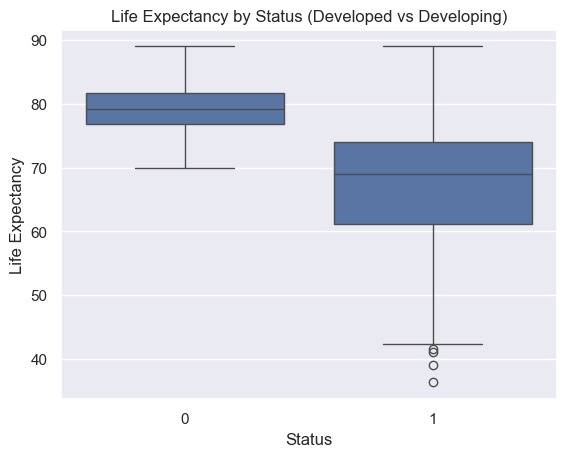

In [94]:
sns.boxplot(x='Status', y='Life_expectancy', data=life)
plt.title('Life Expectancy by Status (Developed vs Developing)')
plt.xlabel('Status')
plt.ylabel('Life Expectancy')
plt.show()

# Distribution of Independent Variables

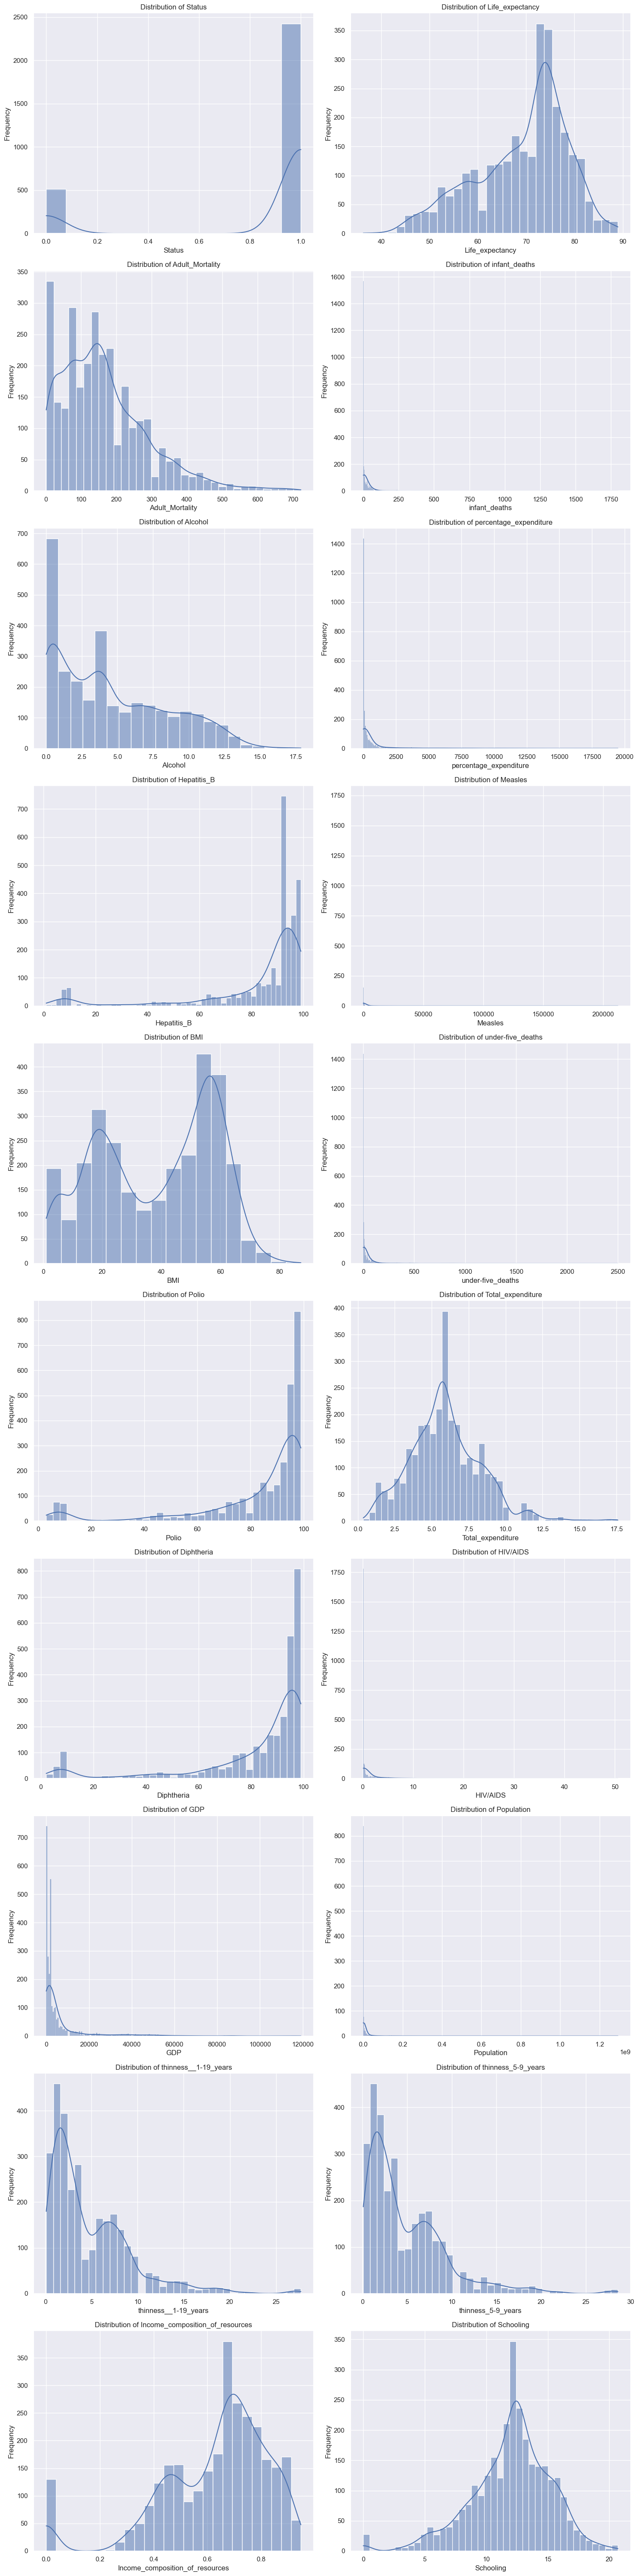

In [95]:
numerical_columns = life.select_dtypes(include=['number']).columns
num_plots = len(numerical_columns)
num_rows = (num_plots + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 6))
for i, column in enumerate(numerical_columns):
    row = i // 2
    col = i % 2
    sns.histplot(life[column], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')
for j in range(i + 1, num_rows * 2):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

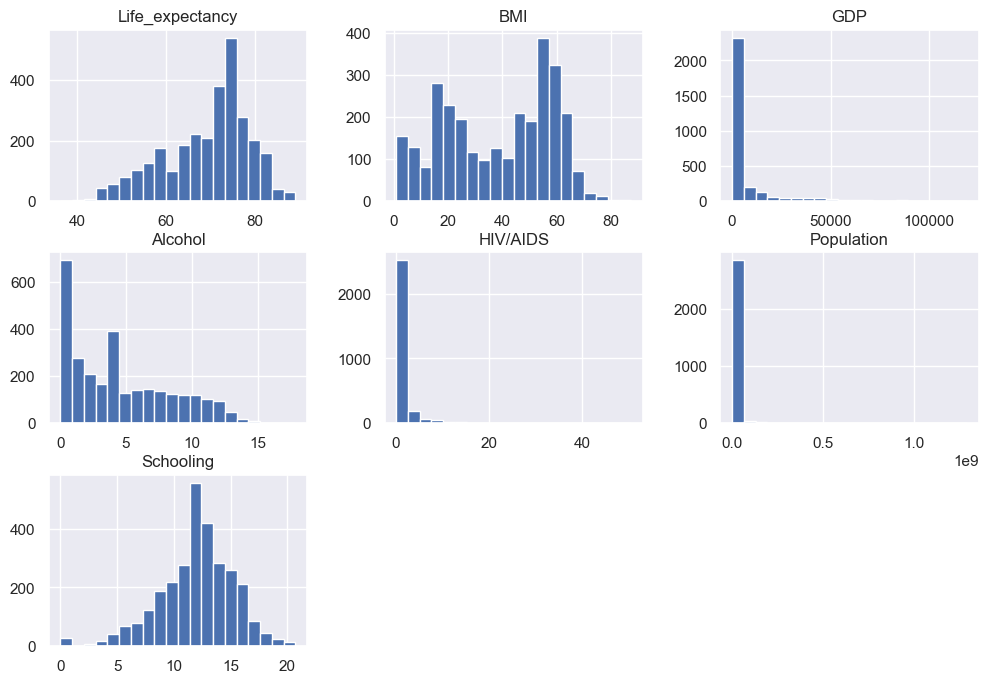

In [96]:
life[["Life_expectancy", "BMI", "GDP", "Alcohol", "HIV/AIDS", "Population", "Schooling"]].hist(bins=20, figsize=(12, 8))
plt.show()

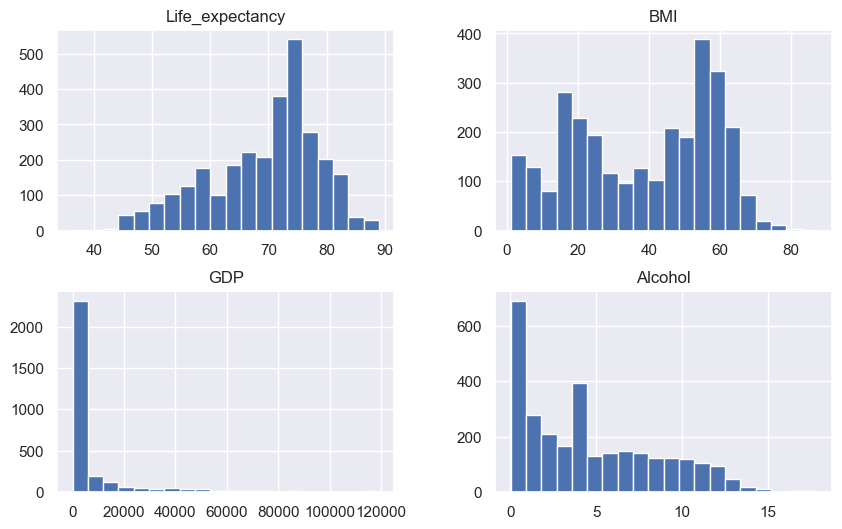

In [97]:
life.hist(column=["Life_expectancy", "BMI", "GDP", "Alcohol"], bins=20, figsize=(10, 6))
plt.show()

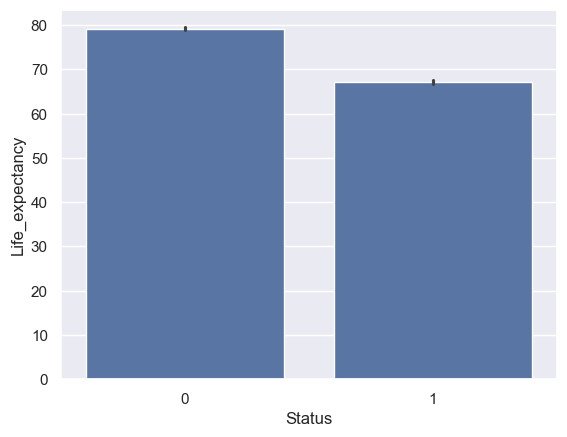

In [98]:
sns.barplot(data=life, x="Status", y="Life_expectancy")
plt.show()

# Scatter Plot independent variables agsint target 

In [99]:
life

Status  Life_expectancy  Adult_Mortality  infant_deaths  Alcohol  \
0          1             65.0            263.0             62     0.01   
1          1             59.9            271.0             64     0.01   
2          1             59.9            268.0             66     0.01   
3          1             59.5            272.0             69     0.01   
4          1             59.2            275.0             71     0.01   
...      ...              ...              ...            ...      ...   
2933       1             44.3            723.0             27     4.36   
2934       1             44.5            715.0             26     4.06   
2935       1             44.8             73.0             25     4.43   
2936       1             45.3            686.0             25     1.72   
2937       1             46.0            665.0             24     1.68   

      percentage_expenditure  Hepatitis_B  Measles   BMI  under-five_deaths  \
0                  71.279624         65.0     1154  19.1                 83   
1                  73.523582         62.0      492  18.6                 86   
2                  73.219243         64.0      430  18.1                 89   
3                  78.184215         67.0     2787  17.6                 93   
4                   7.097109         68.0     3013  17.2                 97   
...                      ...          ...      ...   ...                ...   
2933                0.000000         68.0       31  27.1                 42   
2934                0.000000          7.0      998  26.7                 41   
2935                0.000000         73.0      304  26.3                 40   
2936                0.000000         76.0      529  25.9                 39   
2937                0.000000         79.0     1483  25.5                 39   

      Polio  Total_expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0       6.0               8.16        65.0       0.1  584.259210  33736494.0   
1      58.0               8.18        62.0       0.1  612.696514    327582.0   
2      62.0               8.13        64.0       0.1  631.744976  31731688.0   
3      67.0               8.52        67.0       0.1  669.959000   3696958.0   
4      68.0               7.87        68.0       0.1   63.537231   2978599.0   
...     ...                ...         ...       ...         ...         ...   
2933   67.0               7.13        65.0      33.6  454.366654  12777511.0   
2934    7.0               6.52        68.0      36.7  453.351155  12633897.0   
2935   73.0               6.53        71.0      39.8   57.348340    125525.0   
2936   76.0               6.16        75.0      42.1  548.587312  12366165.0   
2937   78.0               7.10        78.0      43.5  547.358878  12222251.0   

      thinness__1-19_years  thinness_5-9_years  \
0                     17.2                17.3   
1                     17.5                17.5   
2                     17.7                17.7   
3                     17.9                18.0   
4                     18.2                18.2   
...                    ...                 ...   
2933                   9.4                 9.4   
2934                   9.8                 9.9   
2935                   1.2                 1.3   
2936                   1.6                 1.7   
2937                  11.0                11.2   

      Income_composition_of_resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937                            0.434        

# Outlier

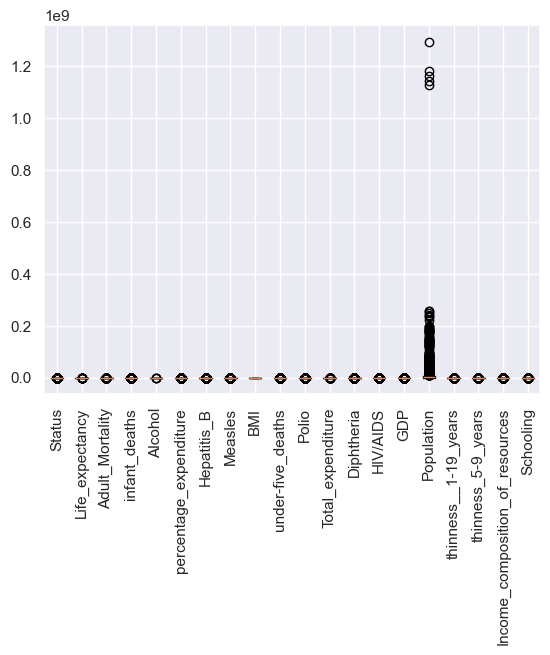

In [100]:
plt.boxplot(life,labels=life.columns )
plt.xticks(rotation=90)
plt.show()

In [101]:
def iqr(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr_value = q3 - q1
    lower_bound = q1 - (1.5 * iqr_value)
    upper_bound = q3 + (1.5 * iqr_value)

    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    num_outliers = outliers.sum()
    total = df.shape[0]
    outlier_percent = (num_outliers / total) * 100

    # Apply treatment based on rules
    if outlier_percent <= 1:
        treatment = "No Treatment"
    elif outlier_percent <= 10:
        treatment = "Mean Imputation"
        mean_val = df.loc[~outliers, col].mean()
        df.loc[outliers, col] = mean_val
    elif outlier_percent <= 20:
        treatment = "Capping"
        df.loc[df[col] < lower_bound, col] = lower_bound
        df.loc[df[col] > upper_bound, col] = upper_bound
    elif outlier_percent >= 20:
        treatment = "Row Removal OR transformation OR binning"
    return num_outliers, outlier_percent, treatment, df

In [102]:
def outlier_iqr(df):
    #data = df.copy()
    cols_to_use = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
    outlier_summary = []
    
    for col in cols_to_use:
        num_outliers, percent, treatment, df_iqr = iqr(df, col)
        outlier_summary.append({
            "Column": col,
            "Num Outliers": num_outliers,
            "Outlier %": round(percent, 2),
            "Treatment Applied": treatment
        })
    outlier_table = pd.DataFrame(outlier_summary)
    display(outlier_table)
    return df_iqr

In [103]:
life_iqr = outlier_iqr(life)
life_iqr

Column  Num Outliers  Outlier % Treatment Applied
0                            Status           512      17.43           Capping
1                   Life_expectancy            17       0.58      No Treatment
2                   Adult_Mortality            86       2.93   Mean Imputation
3                     infant_deaths           315      10.72           Capping
4                           Alcohol             3       0.10      No Treatment
5            percentage_expenditure           389      13.24           Capping
6                       Hepatitis_B           322      10.96           Capping
7                           Measles           542      18.45           Capping
8                               BMI             0       0.00      No Treatment
9                 under-five_deaths           394      13.41           Capping
10                            Polio           279       9.50   Mean Imputation
11                Total_expenditure            51       1.74   Mean Imputation
12                       Diphtheria           298      10.14           Capping
13                         HIV/AIDS           542      18.45           Capping
14                              GDP           445      15.15           Capping
15                       Population           452      15.38           Capping
16             thinness__1-19_years           100       3.40   Mean Imputation
17               thinness_5-9_years            99       3.37   Mean Imputation
18  Income_composition_of_resources           130       4.42   Mean Imputation
19                        Schooling            77       2.62   Mean Imputation

Status  Life_expectancy  Adult_Mortality  infant_deaths  Alcohol  \
0          1             65.0       263.000000             55     0.01   
1          1             59.9       271.000000             55     0.01   
2          1             59.9       268.000000             55     0.01   
3          1             59.5       272.000000             55     0.01   
4          1             59.2       275.000000             55     0.01   
...      ...              ...              ...            ...      ...   
2933       1             44.3       153.071529             27     4.36   
2934       1             44.5       153.071529             26     4.06   
2935       1             44.8        73.000000             25     4.43   
2936       1             45.3       153.071529             25     1.72   
2937       1             46.0       153.071529             24     1.68   

      percentage_expenditure  Hepatitis_B  Measles   BMI  under-five_deaths  \
0                  71.279624         65.0  900.625  19.1                 70   
1                  73.523582         62.0  492.000  18.6                 70   
2                  73.219243         64.0  430.000  18.1                 70   
3                  78.184215         67.0  900.625  17.6                 70   
4                   7.097109         68.0  900.625  17.2                 70   
...                      ...          ...      ...   ...                ...   
2933                0.000000         68.0   31.000  27.1                 42   
2934                0.000000         61.0  900.625  26.7                 41   
2935                0.000000         73.0  304.000  26.3                 40   
2936                0.000000         76.0  529.000  25.9                 39   
2937                0.000000         79.0  900.625  25.5                 39   

          Polio  Total_expenditure  Diphtheria  HIV/AIDS         GDP  \
0     89.118842               8.16        65.0      0.10  584.259210   
1     58.000000               8.18        62.0      0.10  612.696514   
2     62.000000               8.13        64.0      0.10  631.744976   
3     67.000000               8.52        67.0      0.10  669.959000   
4     68.000000               7.87        68.0      0.10   63.537231   
...         ...                ...         ...       ...         ...   
2933  67.000000               7.13        65.0      1.85  454.366654   
2934  89.118842               6.52        68.0      1.85  453.351155   
2935  73.000000               6.53        71.0      1.85   57.348340   
2936  76.000000               6.16        75.0      1.85  548.587312   
2937  78.000000               7.10        78.0      1.85  547.358878   

       Population  thinness__1-19_years  thinness_5-9_years  \
0     10832552.25              4.311769            4.326066   
1       327582.00              4.311769            4.326066   
2     10832552.25              4.311769            4.326066   
3      3696958.00              4.311769            4.326066   
4      2978599.00              4.311769            4.326066   
...           ...                   ...                 ...   
2933  10832552.25              9.400000            9.400000   
2934  10832552.25              9.800000            9.900000   
2935    125525.00              1.200000            1.300000   
2936  10832552.25              1.600000            1.700000   
2937  10832552.25             11.000000           11.200000   

      Income_composition_of_resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.42

In [104]:
life.skew()

Status                             0.000000
Life_expectancy                   -0.642391
Adult_Mortality                    0.656721
infant_deaths                      1.288905
Alcohol                            0.649578
percentage_expenditure             1.243582
Hepatitis_B                       -1.170776
Measles                            1.184587
BMI                               -0.220590
under-five_deaths                  1.239481
Polio                             -1.505516
Total_expenditure                  0.136290
Diphtheria                        -1.257041
HIV/AIDS                           1.209341
GDP                                1.156212
Population                         1.191956
thinness__1-19_years               0.977858
thinness_5-9_years                 0.985009
Income_composition_of_resources   -0.403786
Schooling                         -0.249458
dtype: float64

In [105]:
life

Status  Life_expectancy  Adult_Mortality  infant_deaths  Alcohol  \
0          1             65.0       263.000000             55     0.01   
1          1             59.9       271.000000             55     0.01   
2          1             59.9       268.000000             55     0.01   
3          1             59.5       272.000000             55     0.01   
4          1             59.2       275.000000             55     0.01   
...      ...              ...              ...            ...      ...   
2933       1             44.3       153.071529             27     4.36   
2934       1             44.5       153.071529             26     4.06   
2935       1             44.8        73.000000             25     4.43   
2936       1             45.3       153.071529             25     1.72   
2937       1             46.0       153.071529             24     1.68   

      percentage_expenditure  Hepatitis_B  Measles   BMI  under-five_deaths  \
0                  71.279624         65.0  900.625  19.1                 70   
1                  73.523582         62.0  492.000  18.6                 70   
2                  73.219243         64.0  430.000  18.1                 70   
3                  78.184215         67.0  900.625  17.6                 70   
4                   7.097109         68.0  900.625  17.2                 70   
...                      ...          ...      ...   ...                ...   
2933                0.000000         68.0   31.000  27.1                 42   
2934                0.000000         61.0  900.625  26.7                 41   
2935                0.000000         73.0  304.000  26.3                 40   
2936                0.000000         76.0  529.000  25.9                 39   
2937                0.000000         79.0  900.625  25.5                 39   

          Polio  Total_expenditure  Diphtheria  HIV/AIDS         GDP  \
0     89.118842               8.16        65.0      0.10  584.259210   
1     58.000000               8.18        62.0      0.10  612.696514   
2     62.000000               8.13        64.0      0.10  631.744976   
3     67.000000               8.52        67.0      0.10  669.959000   
4     68.000000               7.87        68.0      0.10   63.537231   
...         ...                ...         ...       ...         ...   
2933  67.000000               7.13        65.0      1.85  454.366654   
2934  89.118842               6.52        68.0      1.85  453.351155   
2935  73.000000               6.53        71.0      1.85   57.348340   
2936  76.000000               6.16        75.0      1.85  548.587312   
2937  78.000000               7.10        78.0      1.85  547.358878   

       Population  thinness__1-19_years  thinness_5-9_years  \
0     10832552.25              4.311769            4.326066   
1       327582.00              4.311769            4.326066   
2     10832552.25              4.311769            4.326066   
3      3696958.00              4.311769            4.326066   
4      2978599.00              4.311769            4.326066   
...           ...                   ...                 ...   
2933  10832552.25              9.400000            9.400000   
2934  10832552.25              9.800000            9.900000   
2935    125525.00              1.200000            1.300000   
2936  10832552.25              1.600000            1.700000   
2937  10832552.25             11.000000           11.200000   

      Income_composition_of_resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.42

# Skew Catagories

In [107]:
def categorize_skew(value):
    """Categorize skewness based on its magnitude."""
    if abs(value) > 1:
        return 'Highly Skewed'
    elif abs(value) > 0.5:
        return 'Moderately Skewed'
    else:
        return 'Approximately Symmetric'

def skew_summary_table(df):
    
    numeric_df = df.select_dtypes(include=['number'])  # Only numeric columns
    skew_values = numeric_df.skew()                    # Compute skewness
    skew_categories = skew_values.apply(categorize_skew)

    summary_df = pd.DataFrame({
        'Skewness': skew_values,
        'Category': skew_categories
    }).sort_values(by='Skewness', ascending=False)

    return summary_df
skew_summary_table(life)

Skewness                 Category
infant_deaths                    1.288905            Highly Skewed
percentage_expenditure           1.243582            Highly Skewed
under-five_deaths                1.239481            Highly Skewed
HIV/AIDS                         1.209341            Highly Skewed
Population                       1.191956            Highly Skewed
Measles                          1.184587            Highly Skewed
GDP                              1.156212            Highly Skewed
thinness_5-9_years               0.985009        Moderately Skewed
thinness__1-19_years             0.977858        Moderately Skewed
Adult_Mortality                  0.656721        Moderately Skewed
Alcohol                          0.649578        Moderately Skewed
Total_expenditure                0.136290  Approximately Symmetric
Status                           0.000000  Approximately Symmetric
BMI                             -0.220590  Approximately Symmetric
Schooling                       -0.249458  Approximately Symmetric
Income_composition_of_resources -0.403786  Approximately Symmetric
Life_expectancy                 -0.642391        Moderately Skewed
Hepatitis_B                     -1.170776            Highly Skewed
Diphtheria                      -1.257041            Highly Skewed
Polio                           -1.505516            Highly Skewed

# Skew Check

In [108]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox, yeojohnson, skew

def best_skew_transformation(df):
    df_transformed = df.copy()
    results = []

    # Store transformation metadata per column
    transform_meta = {}  # format: {column: {"method": ..., "lambda": ...}}

    numeric_cols = df.select_dtypes(include=np.number).columns

    for col in numeric_cols:
        if col == "Status":                                           ## Skipping the tranaformation of target Variable.
            continue
        col_data = df[col].dropna()

        if col_data.nunique() <= 1:
            continue

        original_skew = skew(col_data)
        transform_results = {"Column": col, "Original Skew": round(original_skew, 4)}

        best_transform = None
        best_skew = abs(original_skew)
        best_lambda = None  # Store if Box-Cox or Yeo-Johnson is chosen

        # Log
        if (col_data > 0).all():
            log_data = np.log1p(col_data)
            log_skew = abs(skew(log_data))
            transform_results["Log Skew"] = round(log_skew, 4)
            if log_skew < best_skew:
                best_transform = ("log1p", np.log1p)
                best_skew = log_skew
        else:
            transform_results["Log Skew"] = np.nan

        # Sqrt
        if (col_data >= 0).all():
            sqrt_data = np.sqrt(col_data)
            sqrt_skew = abs(skew(sqrt_data))
            transform_results["Sqrt Skew"] = round(sqrt_skew, 4)
            if sqrt_skew < best_skew:
                best_transform = ("sqrt", np.sqrt)
                best_skew = sqrt_skew
        else:
            transform_results["Sqrt Skew"] = np.nan

        # Box-Cox
        if (col_data > 0).all():
            try:
                boxcox_data, lam_boxcox = boxcox(col_data)
                boxcox_skew = abs(skew(boxcox_data))
                transform_results["Box-Cox Skew"] = round(boxcox_skew, 4)
                if boxcox_skew < best_skew:
                    best_transform = ("boxcox", lambda x: boxcox(x)[0])
                    best_skew = boxcox_skew
                    best_lambda = lam_boxcox
            except:
                transform_results["Box-Cox Skew"] = np.nan
        else:
            transform_results["Box-Cox Skew"] = np.nan

        # Yeo-Johnson
        try:
            yeoj_data, lam_yeo = yeojohnson(col_data)
            yeoj_skew = abs(skew(yeoj_data))
            transform_results["Yeo-Johnson Skew"] = round(yeoj_skew, 4)
            if yeoj_skew < best_skew:
                best_transform = ("yeojohnson", lambda x: yeojohnson(x)[0])
                best_skew = yeoj_skew
                best_lambda = lam_yeo
        except:
            transform_results["Yeo-Johnson Skew"] = np.nan

        # Apply and record best transformation
        if best_transform:
            method_name = best_transform[0]
            transform_results["Best Transformation"] = method_name
            display(col)
            df_transformed[col] = best_transform[1](df[col])
            transform_meta[col] = {
                "method": method_name,
                "lambda": best_lambda  # may be None for log/sqrt
            }
        else:
            transform_results["Best Transformation"] = "Original"
            transform_meta[col] = {"method": "original", "lambda": None}

        results.append(transform_results)

    summary_df = pd.DataFrame(results)
    return df_transformed, summary_df, transform_meta

In [109]:
transformed_life, skew_summary, transform_metadata = best_skew_transformation(life_iqr)
skew_summary

'Life_expectancy'

'Adult_Mortality'

'infant_deaths'

'Alcohol'

'percentage_expenditure'

'Hepatitis_B'

'Measles'

'under-five_deaths'

'Polio'

'Total_expenditure'

'Diphtheria'

'HIV/AIDS'

'GDP'

'Population'

'thinness__1-19_years'

'thinness_5-9_years'

'Income_composition_of_resources'

'Schooling'

Column  Original Skew  Log Skew  Sqrt Skew  \
0                   Life_expectancy        -0.6421    0.9466     0.7937   
1                   Adult_Mortality         0.6564    1.2587     0.1796   
2                     infant_deaths         1.2882       NaN     0.7020   
3                           Alcohol         0.6492    0.3224     0.1387   
4            percentage_expenditure         1.2429       NaN     0.6791   
5                       Hepatitis_B        -1.1702    1.3023     1.2380   
6                           Measles         1.1840       NaN     0.8372   
7                               BMI        -0.2205    1.2757     0.6606   
8                 under-five_deaths         1.2388       NaN     0.7120   
9                             Polio        -1.5047    1.8275     1.6615   
10                Total_expenditure         0.1362    0.8777     0.4674   
11                       Diphtheria        -1.2564    1.4822     1.3706   
12                         HIV/AIDS         1.2087    1.1012     1.0518   
13                              GDP         1.1556    0.7060     0.5943   
14                       Population         1.1913    1.2873     0.6471   
15             thinness__1-19_years         0.9774    0.0302     0.2839   
16               thinness_5-9_years         0.9845    0.0699     0.2530   
17  Income_composition_of_resources        -0.4036    0.5862     0.6553   
18                        Schooling        -0.2493    0.9521     0.6227   

    Box-Cox Skew  Yeo-Johnson Skew Best Transformation  
0         0.1062            0.1054          yeojohnson  
1         0.1442            0.1369          yeojohnson  
2            NaN            0.1272          yeojohnson  
3         0.3711            0.0839          yeojohnson  
4            NaN            0.1114          yeojohnson  
5         0.4757            0.4746          yeojohnson  
6            NaN            0.0851          yeojohnson  
7         0.3210            0.3034            Original  
8            NaN            0.1152          yeojohnson  
9         0.4155            0.4145          yeojohnson  
10        0.0349            0.0234          yeojohnson  
11        0.5642            0.5627          yeojohnson  
12        0.6048            0.7828              boxcox  
13        0.0722            0.0719          yeojohnson  
14        0.1191            0.1191          yeojohnson  
15        0.0664            0.0052          yeojohnson  
16        0.0754            0.0116          yeojohnson  
17        0.1216            0.0724          yeojohnson  
18        0.0301            0.0263          yeojohnson

In [110]:
transformed_life.skew()

Status                             0.000000
Life_expectancy                   -0.105437
Adult_Mortality                   -0.137003
infant_deaths                      0.127230
Alcohol                           -0.083975
percentage_expenditure            -0.111418
Hepatitis_B                       -0.474807
Measles                            0.085193
BMI                               -0.220590
under-five_deaths                  0.115227
Polio                             -0.414746
Total_expenditure                 -0.023370
Diphtheria                        -0.562989
HIV/AIDS                           0.605143
GDP                               -0.071962
Population                        -0.119133
thinness__1-19_years              -0.005167
thinness_5-9_years                -0.011571
Income_composition_of_resources   -0.072445
Schooling                         -0.026308
dtype: float64

In [111]:
def mape(y_true,y_pred):
    mask = y_true != 0
    mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
    return mape

In [112]:
 def smape(y_true,y_pred):
      y_true, y_pred = np.array(y_true), np.array(y_pred)
      denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
      diff = np.abs(y_true - y_pred)    
      # Avoid division by zero
      nonzero_mask = denominator != 0
      smape_value = np.mean(diff[nonzero_mask] / denominator[nonzero_mask]) * 100    
      return smape_value

In [113]:
def model_performance(model, x_train, y_train,x_validation, y_validation):
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_validation = model.predict(x_validation)

    mask_train = y_train != 0
    mape_train = np.mean(np.abs((y_train[mask_train] - y_pred_train[mask_train]) / y_train[mask_train])) * 100

    mask_validate = y_validation != 0
    mape_test = np.mean(np.abs((y_validation[mask_validate] - y_pred_validation[mask_validate]) / y_validation[mask_validate])) * 100

    n_train, p_train = x_train.shape
    n_test, p_test = x_validation.shape
    train_adj_r2 = 100 * (1 - (1 - r2_score(y_train, y_pred_train) / 100) * (n_train - 1) / (n_train - p_train - 1))
    test_adj_r2 = 100 * (1 - (1 - r2_score(y_validation, y_pred_validation) / 100) * (n_test - 1) / (n_test - p_test - 1))

    #coefficients = pd.Series(model.coef_, index=pd.DataFrame(x_train).columns)
    #features_linear = coefficients[coefficients != 0].sort_values(key=np.abs, ascending=False)
    
    print("\nAccuracy Scores for Linear Regression model on tranaformed and Scaled data::")
    print("*R2 score:Train",r2_score(y_train, y_pred_train))
    print("*R2 score:",r2_score(y_validation, y_pred_validation),"\n")
    print("*Adjusted R2 score:Train",train_adj_r2)
    print("*Adjusted R2 score:Test",test_adj_r2,"\n")
    print("*MAE:Train",mean_absolute_error(y_train, y_pred_train))
    print("*MAE:Validation",mean_absolute_error(y_validation, y_pred_validation),"\n")
    print("*MSE:Train",mean_squared_error(y_train, y_pred_train))
    print("*MSE:Validation",mean_squared_error(y_validation, y_pred_validation),"\n")
    print("*RMSE:Train",np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print("*RMSE:Train",np.sqrt(mean_squared_error(y_validation, y_pred_validation)),"\n")
    print("*SMAPE_Train Error:",smape(y_train,y_pred_train))
    print("*SMAPE_test Error", smape(y_validation,y_pred_validation),"\n")
    print("*MAPE_Train Error:",mape(y_train,y_pred_train))
    print("*MAPE_test Error", mape(y_validation,y_pred_validation),"\n")
    #print("Coefficints are:\n",coefficients)
    #print("\nCoefficints are:\n",features_linear)

In [114]:
#train, validation = train_test_split(life,train_size=0.75, random_state=1)
train, validation = train_test_split(life,train_size=0.75, random_state=1)

In [115]:
x_train = train.drop([target_col],axis=1)
y_train =train[target_col]

x_validation = validation.drop([target_col],axis=1)
y_validation = validation[target_col]

In [116]:
life

Status  Life_expectancy  Adult_Mortality  infant_deaths  Alcohol  \
0          1             65.0       263.000000             55     0.01   
1          1             59.9       271.000000             55     0.01   
2          1             59.9       268.000000             55     0.01   
3          1             59.5       272.000000             55     0.01   
4          1             59.2       275.000000             55     0.01   
...      ...              ...              ...            ...      ...   
2933       1             44.3       153.071529             27     4.36   
2934       1             44.5       153.071529             26     4.06   
2935       1             44.8        73.000000             25     4.43   
2936       1             45.3       153.071529             25     1.72   
2937       1             46.0       153.071529             24     1.68   

      percentage_expenditure  Hepatitis_B  Measles   BMI  under-five_deaths  \
0                  71.279624         65.0  900.625  19.1                 70   
1                  73.523582         62.0  492.000  18.6                 70   
2                  73.219243         64.0  430.000  18.1                 70   
3                  78.184215         67.0  900.625  17.6                 70   
4                   7.097109         68.0  900.625  17.2                 70   
...                      ...          ...      ...   ...                ...   
2933                0.000000         68.0   31.000  27.1                 42   
2934                0.000000         61.0  900.625  26.7                 41   
2935                0.000000         73.0  304.000  26.3                 40   
2936                0.000000         76.0  529.000  25.9                 39   
2937                0.000000         79.0  900.625  25.5                 39   

          Polio  Total_expenditure  Diphtheria  HIV/AIDS         GDP  \
0     89.118842               8.16        65.0      0.10  584.259210   
1     58.000000               8.18        62.0      0.10  612.696514   
2     62.000000               8.13        64.0      0.10  631.744976   
3     67.000000               8.52        67.0      0.10  669.959000   
4     68.000000               7.87        68.0      0.10   63.537231   
...         ...                ...         ...       ...         ...   
2933  67.000000               7.13        65.0      1.85  454.366654   
2934  89.118842               6.52        68.0      1.85  453.351155   
2935  73.000000               6.53        71.0      1.85   57.348340   
2936  76.000000               6.16        75.0      1.85  548.587312   
2937  78.000000               7.10        78.0      1.85  547.358878   

       Population  thinness__1-19_years  thinness_5-9_years  \
0     10832552.25              4.311769            4.326066   
1       327582.00              4.311769            4.326066   
2     10832552.25              4.311769            4.326066   
3      3696958.00              4.311769            4.326066   
4      2978599.00              4.311769            4.326066   
...           ...                   ...                 ...   
2933  10832552.25              9.400000            9.400000   
2934  10832552.25              9.800000            9.900000   
2935    125525.00              1.200000            1.300000   
2936  10832552.25              1.600000            1.700000   
2937  10832552.25             11.000000           11.200000   

      Income_composition_of_resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.42

In [117]:
def predict_comparison(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_validation)
    plt.figure(figsize=(6, 6))
    plt.scatter(y_validation, y_pred, alpha=0.6, color='blue')
    plt.plot([y_validation.min(), y_validation.max()], [y_validation.min(), y_validation.max()], '--r')
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    model_name = model.__class__.__name__
    plt.title(f"Actual vs Predicted ({model_name})")    
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Splitting into training & testing dataset

In [126]:
life

Status  Life_expectancy  Adult_Mortality  infant_deaths  Alcohol  \
0          1             65.0       263.000000             55     0.01   
1          1             59.9       271.000000             55     0.01   
2          1             59.9       268.000000             55     0.01   
3          1             59.5       272.000000             55     0.01   
4          1             59.2       275.000000             55     0.01   
...      ...              ...              ...            ...      ...   
2933       1             44.3       153.071529             27     4.36   
2934       1             44.5       153.071529             26     4.06   
2935       1             44.8        73.000000             25     4.43   
2936       1             45.3       153.071529             25     1.72   
2937       1             46.0       153.071529             24     1.68   

      percentage_expenditure  Hepatitis_B  Measles   BMI  under-five_deaths  \
0                  71.279624         65.0  900.625  19.1                 70   
1                  73.523582         62.0  492.000  18.6                 70   
2                  73.219243         64.0  430.000  18.1                 70   
3                  78.184215         67.0  900.625  17.6                 70   
4                   7.097109         68.0  900.625  17.2                 70   
...                      ...          ...      ...   ...                ...   
2933                0.000000         68.0   31.000  27.1                 42   
2934                0.000000         61.0  900.625  26.7                 41   
2935                0.000000         73.0  304.000  26.3                 40   
2936                0.000000         76.0  529.000  25.9                 39   
2937                0.000000         79.0  900.625  25.5                 39   

          Polio  Total_expenditure  Diphtheria  HIV/AIDS         GDP  \
0     89.118842               8.16        65.0      0.10  584.259210   
1     58.000000               8.18        62.0      0.10  612.696514   
2     62.000000               8.13        64.0      0.10  631.744976   
3     67.000000               8.52        67.0      0.10  669.959000   
4     68.000000               7.87        68.0      0.10   63.537231   
...         ...                ...         ...       ...         ...   
2933  67.000000               7.13        65.0      1.85  454.366654   
2934  89.118842               6.52        68.0      1.85  453.351155   
2935  73.000000               6.53        71.0      1.85   57.348340   
2936  76.000000               6.16        75.0      1.85  548.587312   
2937  78.000000               7.10        78.0      1.85  547.358878   

       Population  thinness__1-19_years  thinness_5-9_years  \
0     10832552.25              4.311769            4.326066   
1       327582.00              4.311769            4.326066   
2     10832552.25              4.311769            4.326066   
3      3696958.00              4.311769            4.326066   
4      2978599.00              4.311769            4.326066   
...           ...                   ...                 ...   
2933  10832552.25              9.400000            9.400000   
2934  10832552.25              9.800000            9.900000   
2935    125525.00              1.200000            1.300000   
2936  10832552.25              1.600000            1.700000   
2937  10832552.25             11.000000           11.200000   

      Income_composition_of_resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.42

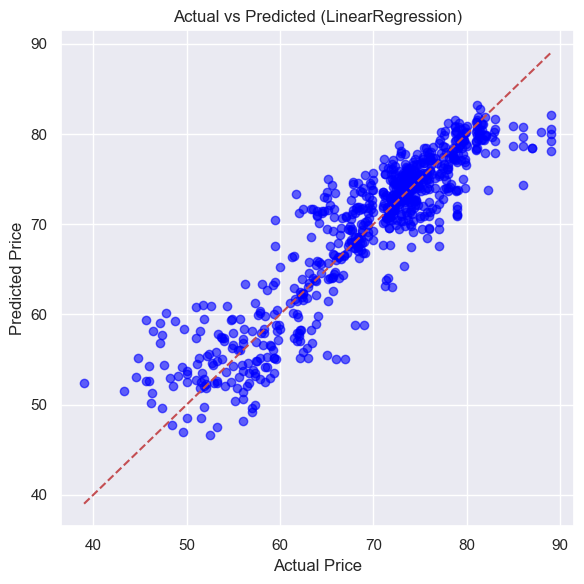

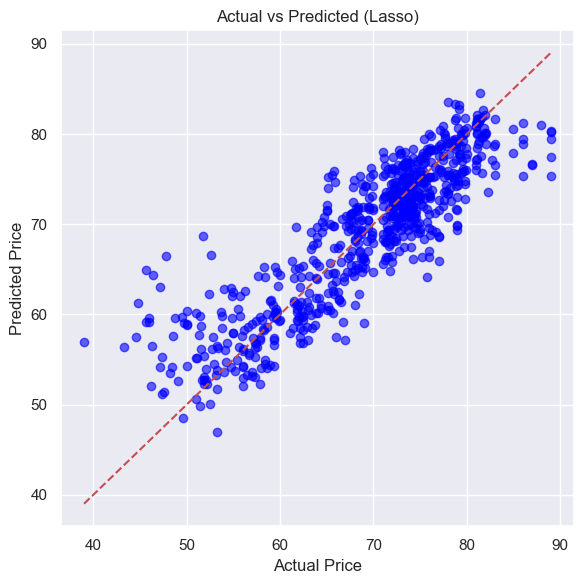

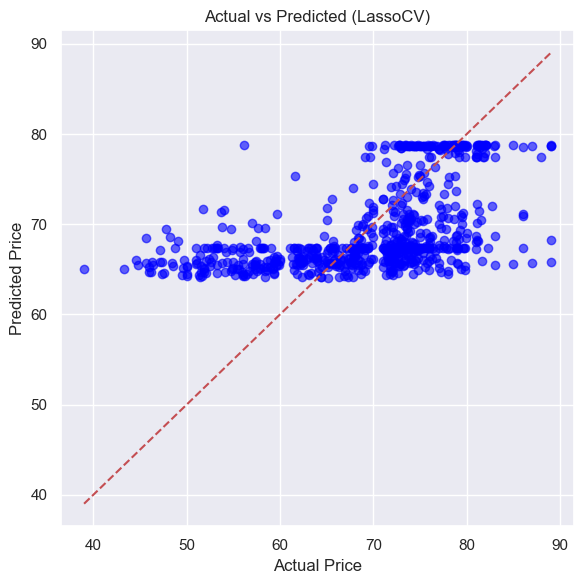

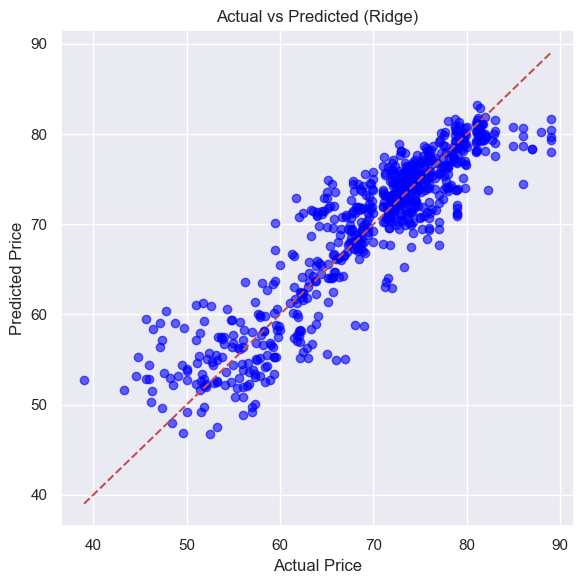

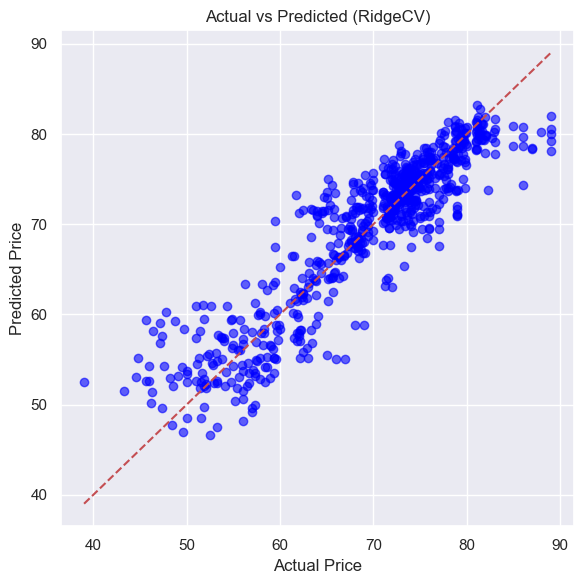

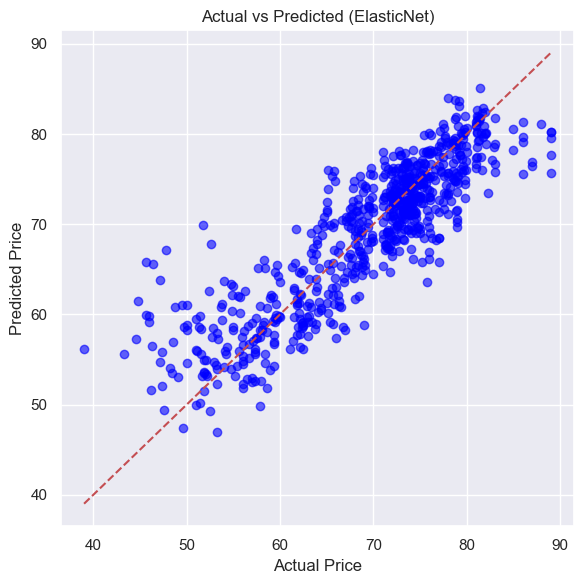

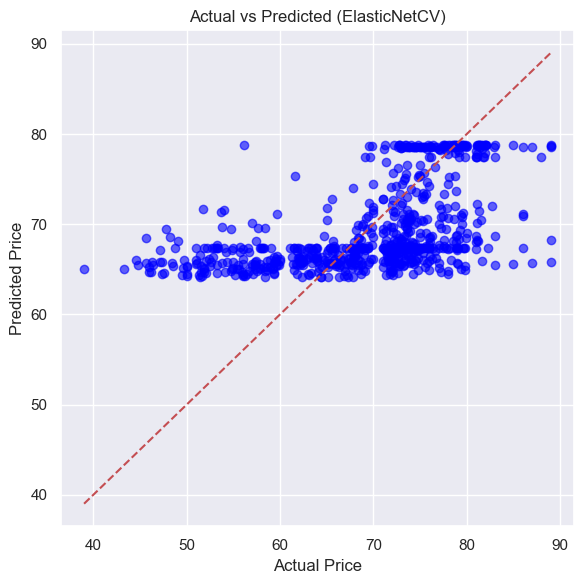

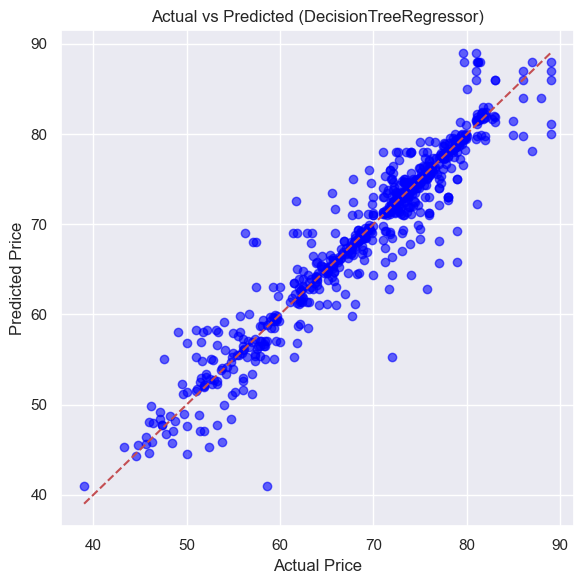

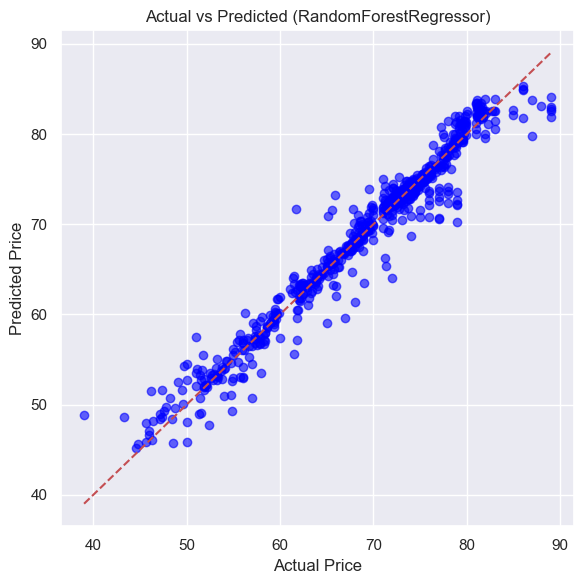

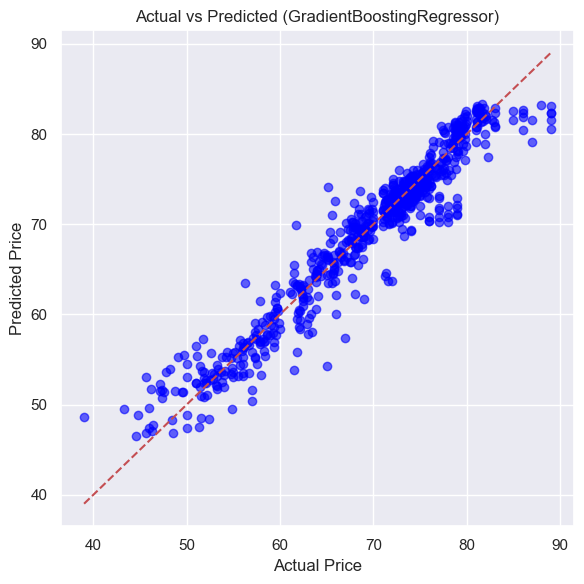

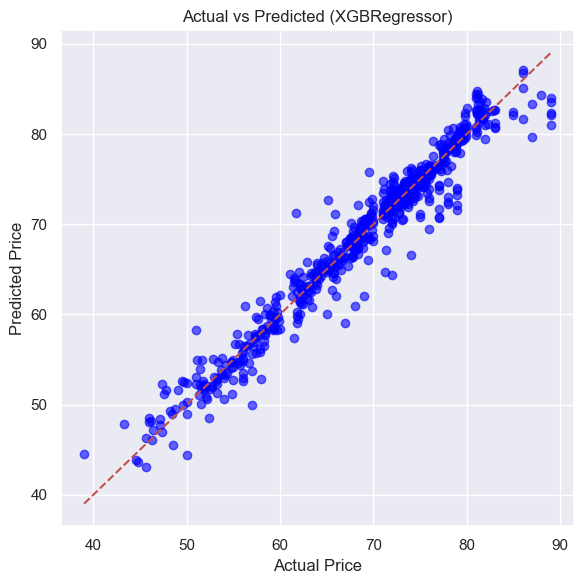

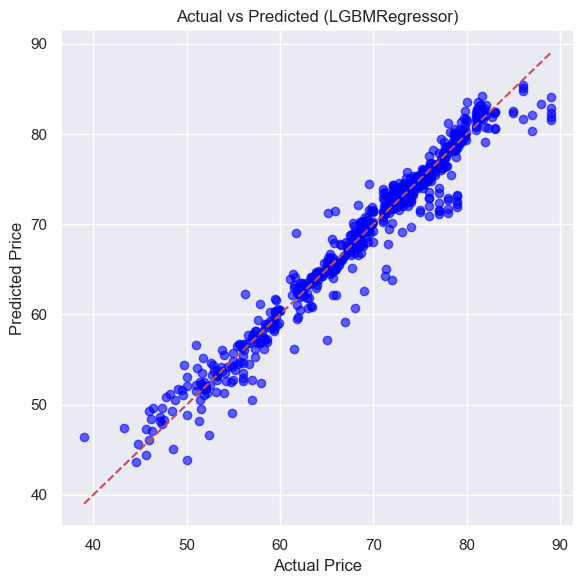

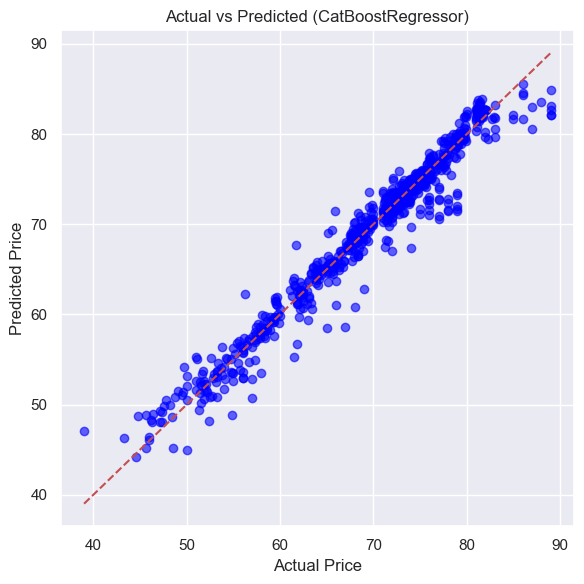

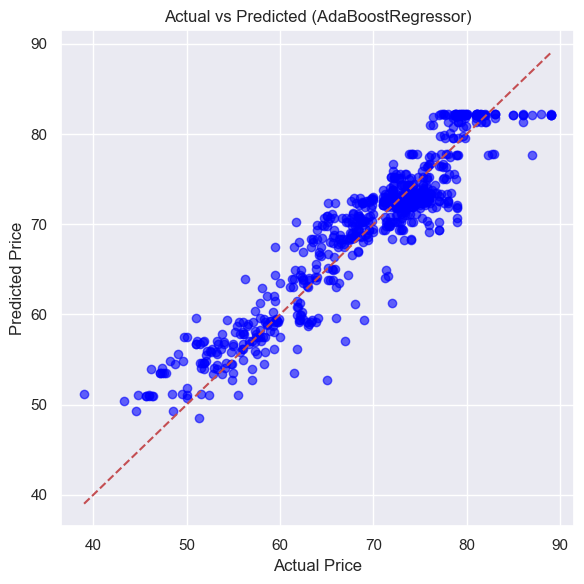

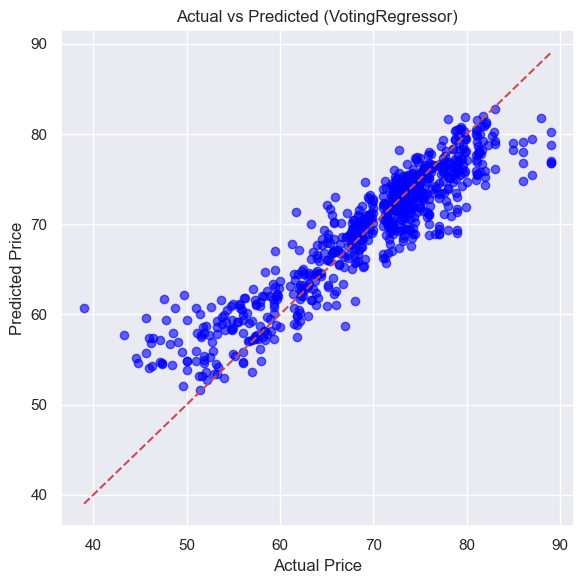

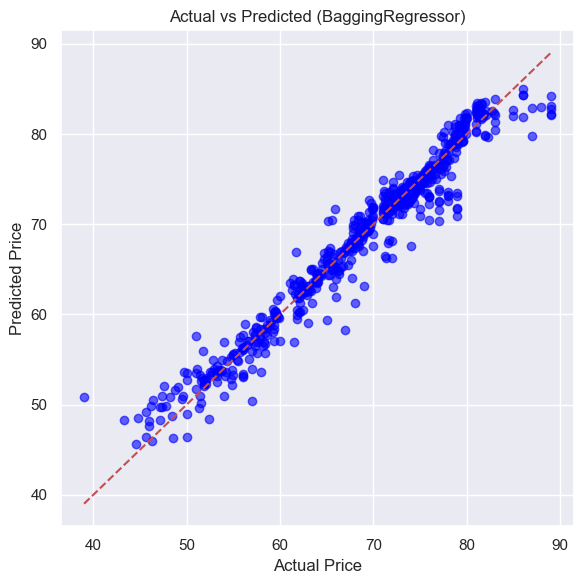


 Model Performance Comparison:


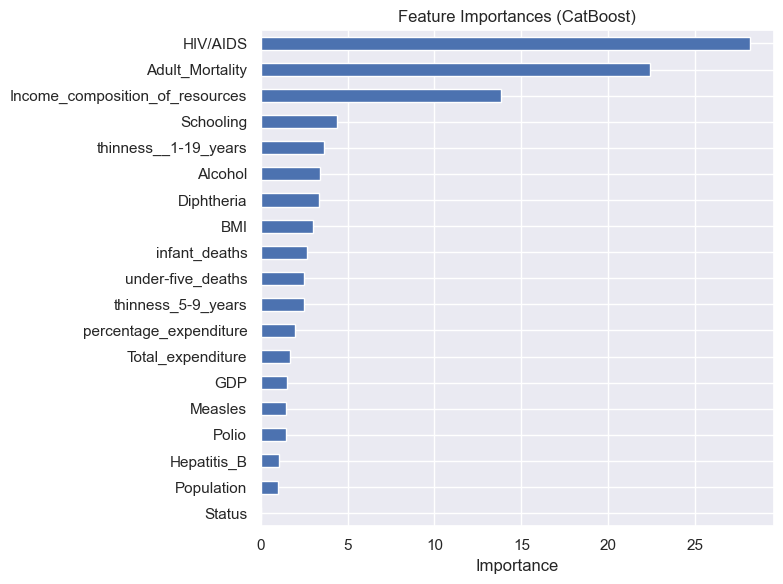

In [127]:
# Models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso L1 Normalization": Lasso(),
    "LassoCV (Cross Validation)": LassoCV(cv=5),
    "Ridge": Ridge(),
    "RidgeCV": RidgeCV(cv=5),
    "ElasticNet": ElasticNet(),
    "ElasticNetCV": ElasticNetCV(cv=5),
    #"SVR (poly)": SVR(kernel="poly"),
    #"SVR (linear)": SVR(kernel="linear"),
    #"SVR (rbf)": SVR(kernel="rbf"),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0),
    "LightGBM": LGBMRegressor(verbose=-1),
    "CatBoost": CatBoostRegressor(verbose=False),
    "AdaBoost": AdaBoostRegressor(),
    "Voting Regressor": VotingRegressor(estimators=[('lr', LinearRegression()),('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
            ('knn', KNeighborsRegressor())]),
    "Bagging Regressor": BaggingRegressor(estimator=DecisionTreeRegressor(random_state=42),n_estimators=50,max_samples=0.8,max_features=0.8,random_state=42,
        n_jobs=-1),
}

# Dictionary to hold all results
model_scores = []

# Train, predict and evaluate
for name, model in models.items():
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_validation)

   #y_pred_train  = reversetransformation(pd.DataFrame(y_train_pred, columns=["charges"]))
   #y_pred_validation  = reversetransformation(pd.DataFrame(y_test_pred, columns=["charges"]))

    #y_train  = reversetransformation(pd.DataFrame(y_train))
    #y_test  = reversetransformation(pd.DataFrame(y_test))   
    predict_comparison(model)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_validation, y_test_pred)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_validation, y_test_pred)

    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_validation, y_test_pred)
    smape_train = smape(y_train, y_train_pred)
    smape_test = smape(y_validation, y_test_pred)

    overfitting = "Y" if (r2_train - r2_test) > 0.1 else "N"

    model_scores.append({
        "Model": name,
        "Train MAE": mae_train,
        "Test MAE": mae_test,
        "Train MSE": mse_train,
        "Test MSE": mse_test,
        "Train R²": r2_train,
        "Test R²": r2_test,
        "Train SMAPE": smape_train,
        "Test SMAPE": smape_test,
        "Overfitting (Y/N)": overfitting,
        "Model Object": model
    })

results_df = pd.DataFrame(model_scores).drop(columns="Model Object")
results_df_sorted = results_df.sort_values(by="Test R²", ascending=False)


print("\n Model Performance Comparison:")
display(results_df_sorted.style.background_gradient(cmap='coolwarm', subset=["Train R²", "Test R²"]))

best_model_row = model_scores[np.argmax([m["Test R²"] for m in model_scores])]
best_model = best_model_row["Model Object"]
best_model_name = best_model_row["Model"]

if hasattr(best_model, "feature_importances_"):
    importances = best_model.feature_importances_
    feat_names = x_train.columns if hasattr(x_train, 'columns') else [f'Feature {i}' for i in range(x_train.shape[1])]
    pd.Series(importances, index=feat_names).sort_values().plot(kind='barh', figsize=(8, 6))
    plt.title(f"Feature Importances ({best_model_name})")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()
else:
    print(f"\n {best_model_name} does not support feature importances.")


# Matrix

In [128]:
#y_train y_train_pred
#y_validation y_test_pred


# Confusion Matrix
cm = confusion_matrix(y_validation, y_test_pred)
print("Confusion Matrix:\n", cm)

# Precision, Recall, F1-score, Accuracy
precision = precision_score(y_validation, y_test_pred)
recall = recall_score(y_validation, y_test_pred)
f1 = f1_score(y_validation, y_test_pred)
accuracy = accuracy_score(y_validation, y_test_predd)

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"Accuracy:  {accuracy:.4f}")

# Optional: Full classification report
print("\nClassification Report:\n", classification_report(y_true, y_pred))


ValueError: continuous is not supported